# <font color='red'>PROJET 5 -DATA ANALYST -  
# <font color='red'> Créez et utilisez une base de données immobilière avec SQL </font>

Remarque :  
Dans ma fonction Description_Fichier_Tableau :
Je pourrai l'améliorer pour avoir une colonne avec les valeurs du type ' ' ou '     '. 
Il faudrait que je regarde les expressions régulières pour identifier le nombre de valeur de ce type avec la bonne regexp par colonne, et afficher cette valeure.

In [3]:
import re

##### RECHERCHE pour une fonction avec les valeurs blanches

In [5]:
#re1 = "( *)"
#re1= r"[ ]+"
#re1=r"[^\S][\s]+[^\S]"
#=> signifie a priori : \S caractères non blanc \s : caractères blanc (espace tab...)
#=> [\s]+ un nombre quelconque de caractère blanc mais au moins un
#=>[^\S] : pas de caractères non blanc
#=>[^\S] : pas de caractères non blanc
#le pb c'est que sa délimite la zone de la re mais ça n'exclut pas qu'il y ait qqc.
re1 = r"\A[\s]+$"
#=> \A signifie a priori : en début de chaine
#=> $ signifie a priori : en fin de chaine
#=> signifie a priori : \s : caractères blanc (espace tab...)
#=> [\s]+ un nombre quelconque de caractère blanc mais au moins un
re2 = r"\A[\s]*$"
#=> [\s]+ un nombre quelconque de caractère blanc même aucun
#=>pour de capter '' aussi

In [6]:
chaine1 = " "

In [7]:
resultat1 = re.match(re1,chaine1)
print(resultat1)

<re.Match object; span=(0, 1), match=' '>


In [8]:
print(resultat1 is None)

False


In [9]:
chaine2 = ' abcd'
resultat2 = re.match(re1,chaine2)
print(resultat2)

None


In [10]:
print(resultat2 is None)

True


In [11]:
chaine3 ="abcd"
resultat3 = re.match(re1,chaine3)
print(resultat3)

None


In [12]:
print(resultat3 is None)

True


In [13]:
liste_test = [ " ", ' ',''' ''',' abcd', 'ab cd', 'abcd ', '']

In [14]:
for elt in liste_test :
    resultat = re.match(re1,elt)
    print(elt," => resultat trouvé", resultat is not None) 

   => resultat trouvé True
   => resultat trouvé True
   => resultat trouvé True
 abcd  => resultat trouvé False
ab cd  => resultat trouvé False
abcd   => resultat trouvé False
  => resultat trouvé False


In [15]:
for elt in liste_test :
    resultat = re.match(re2,elt)
    print(elt," => resultat trouvé", resultat is not None) 

   => resultat trouvé True
   => resultat trouvé True
   => resultat trouvé True
 abcd  => resultat trouvé False
ab cd  => resultat trouvé False
abcd   => resultat trouvé False
  => resultat trouvé True


## <font color='red'><u> I. IMPORTATION DES MODULES UTILES </u></font>

In [17]:
#Importation de la librairie Numpy
import numpy as np

#Importation de la librairie Pandas
import pandas as pd

## <font color='red'><u> II. IMPORTATION DES FICHIERS </u></font>

In [19]:
donnees_communes = pd.read_excel('donnees_communes.xlsx')

In [20]:
referentiel_geographique =  pd.read_excel('fr-esr-referentiel-geographique.xlsx')

In [21]:
valeurs_foncieres = pd.read_excel('Valeurs-foncières.xlsx')

## <font color='red'><u> III. ETUDE DES FICHIERS </u></font>

In [23]:
def Description_Fichier(FICHIER):
    
    #Consulter le nombre de colonnes
    print("Le tableau comporte ",FICHIER.shape[1]," colonne(s) : ")
    
    for elt in FICHIER.columns :
        print(elt)
        
    print("\n")

    #le type de données et Le nombre de valeurs présentes dans chacune des colonnes
    for elt in FICHIER.columns :
        print("La colonne ",elt," (est de type ",FICHIER[elt].dtypes," ) et contient :")
        print("\t", len(FICHIER[elt])," lignes")
        print("\t", FICHIER[elt].notna().sum()," valeur(s) non-vide(s)")
        print("\t", FICHIER[elt].isna().sum()," valeur(s) vide(s)")
        print ("\t", len(FICHIER[elt].value_counts()), " valeur(s) distincte(s)." )
        print("\n")

In [24]:
def Description_Fichier_Tableau(FICHIER):
    
    #création d'un DataFrame qui va contenir les colonnes du Fichier en Index, 
    #et la description des lignes dans les colonnes
    Tab_Descriptif = pd.DataFrame(index = FICHIER.columns, 
                                  columns=['Type','Nb lignes',
                                           'Valeurs non-vides','Valeurs vides',
                                           'Valeurs distinctes'])

    #remplissage des lignes
    for elt in FICHIER.columns :
        Tab_Descriptif.loc[elt,:] = [FICHIER[elt].dtypes, len(FICHIER[elt]) , 
                                     FICHIER[elt].notna().sum() ,FICHIER[elt].isna().sum(),
                                     len(FICHIER[elt].unique()) ]

    #print(Tab_Descriptif)
    return Tab_Descriptif

##### RECHERCHE pour une fonction avec les valeurs blanches

In [26]:
donnees_communes['CODCAN']

0        08
1        01
2        01
3        22
4        04
         ..
34986    04
34987    06
34988    99
34989    14
34990    16
Name: CODCAN, Length: 34991, dtype: object

In [27]:
re1 = r"\A[\s]+$"

In [28]:
donnees_communes['CODCAN'].str.match(re1)

0        False
1        False
2        False
3          NaN
4        False
         ...  
34986    False
34987    False
34988      NaN
34989      NaN
34990      NaN
Name: CODCAN, Length: 34991, dtype: object

In [29]:
donnees_communes['CODCAN'].str.match(re1).value_counts()

CODCAN
False    15593
True        76
Name: count, dtype: int64

In [30]:
donnees_communes['CODCAN'].str.match(re1).sum()

76

In [31]:
help(pd.Series.str.match)

Help on function match in module pandas.core.strings.accessor:

match(self, pat: 'str', case: 'bool' = True, flags: 'int' = 0, na=None)
    Determine if each string starts with a match of a regular expression.

    Parameters
    ----------
    pat : str
        Character sequence.
    case : bool, default True
        If True, case sensitive.
    flags : int, default 0 (no flags)
        Regex module flags, e.g. re.IGNORECASE.
    na : scalar, optional
        Fill value for missing values. The default depends on dtype of the
        array. For object-dtype, ``numpy.nan`` is used. For ``StringDtype``,
        ``pandas.NA`` is used.

    Returns
    -------
    Series/Index/array of boolean values

    See Also
    --------
    fullmatch : Stricter matching that requires the entire string to match.
    contains : Analogous, but less strict, relying on re.search instead of
        re.match.
    extract : Extract matched groups.

    Examples
    --------
    >>> ser = pd.Series(["horse"

##### RECHERCHE pour une fonction avec les valeurs blanches

In [33]:
def Description_Fichier_Tableau_avc_ValBlanches(FICHIER):
    re2 = r"\A[\s]*$"
    
    #création d'un DataFrame qui va contenir les colonnes du Fichier en Index, 
    #et la description des lignes dans les colonnes
    Tab_Descriptif = pd.DataFrame(index = FICHIER.columns, 
                                  columns=['Type','Nb lignes',
                                           'Valeurs non-vides','Valeurs vides',
                                           'Valeurs distinctes','Valeurs blanches'])

    #remplissage des lignes
    for elt in FICHIER.columns :
        col_string = (FICHIER[elt]).astype('string')
        Tab_Descriptif.loc[elt,:] = [FICHIER[elt].dtypes, len(FICHIER[elt]) , 
                                     FICHIER[elt].notna().sum() ,FICHIER[elt].isna().sum(),
                                     len(FICHIER[elt].unique()),col_string.str.match(re2).sum() ]

    #print(Tab_Descriptif)
    return Tab_Descriptif

### <font color='green'><u> A. FICHIER donnees_communes </u></font>

In [35]:
donnees_communes.head()

,CODREG,CODDEP,CODARR,CODCAN,CODCOM,COM,PMUN,PCAP,PTOT
0,84,01,2.0,08,1,L'Abergement-Clémenciat,779,19,798
1,84,01,1.0,01,2,L'Abergement-de-Varey,256,1,257
2,84,01,1.0,01,4,Ambérieu-en-Bugey,14134,380,14514
3,84,01,2.0,22,5,Ambérieux-en-Dombes,1751,25,1776
4,84,01,1.0,04,6,Ambléon,112,6,118


In [36]:
donnees_communes.shape

(34991, 9)

In [37]:
donnees_communes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34991 entries, 0 to 34990
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CODREG  34991 non-null  int64  
 1   CODDEP  34991 non-null  object 
 2   CODARR  34990 non-null  float64
 3   CODCAN  34990 non-null  object 
 4   CODCOM  34991 non-null  int64  
 5   COM     34991 non-null  object 
 6   PMUN    34991 non-null  int64  
 7   PCAP    34991 non-null  int64  
 8   PTOT    34991 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.4+ MB


In [38]:
Description_Fichier_Tableau(donnees_communes).T

,CODREG,CODDEP,CODARR,CODCAN,CODCOM,COM,PMUN,PCAP,PTOT
Type,int64,object,float64,object,int64,object,int64,int64,int64
Nb lignes,34991,34991,34991,34991,34991,34991,34991,34991,34991
Valeurs non-vides,34991,34991,34990,34990,34991,34991,34991,34991,34991
Valeurs vides,0,0,1,1,0,0,0,0,0
Valeurs distinctes,17,100,10,60,908,32732,5900,719,5931


In [39]:
Description_Fichier_Tableau_avc_ValBlanches(donnees_communes)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
CODREG,int64,34991,34991,0,17,0
CODDEP,object,34991,34991,0,100,0
CODARR,float64,34991,34990,1,10,0
CODCAN,object,34991,34990,1,60,76
CODCOM,int64,34991,34991,0,908,0
COM,object,34991,34991,0,32732,0
PMUN,int64,34991,34991,0,5900,0
PCAP,int64,34991,34991,0,719,0
PTOT,int64,34991,34991,0,5931,0


### <font color='green'><u> B. FICHIER referentiel_geographique </u></font>

In [41]:
referentiel_geographique.head()

,regrgp_nom,reg_nom,reg_nom_old,aca_nom,dep_nom,com_code,com_code1,com_code2,com_id,com_nom_maj_court,...,fd_id,fr_id,fe_id,uu_id_99,au_code,au_id,auc_id,auc_nom,uu_id_10,geolocalisation
0,Province,Auvergne-Rhône-Alpes,Rhône-Alpes,Lyon,Ain,01001,1001,1001,C01001,L ABERGEMENT CLEMENCIAT,...,FD111,FR11,FE1,SO,NaN,AU997,C01001,L'Abergement-Clémenciat,SO,"46.1534255214,4.92611354223"
1,Province,Auvergne-Rhône-Alpes,Rhône-Alpes,Lyon,Ain,01002,1002,1002,C01002,L ABERGEMENT DE VAREY,...,FD111,FR11,FE1,SO,2,AU002,AU002,Lyon,SO,"46.0091878776,5.42801696363"
2,Province,Auvergne-Rhône-Alpes,Rhône-Alpes,Lyon,Ain,01003,1003,1003,C01003,AMAREINS,...,FD111,FR11,FE1,SO,SO,SO,SO,SO,SO,NaN
3,Province,Auvergne-Rhône-Alpes,Rhône-Alpes,Lyon,Ain,01004,1004,1004,C01004,AMBERIEU EN BUGEY,...,FD111,FR11,FE1,UU01303,2,AU002,AU002,Lyon,UU01302,"45.9608475114,5.3729257777"
4,Province,Auvergne-Rhône-Alpes,Rhône-Alpes,Lyon,Ain,01005,1005,1005,C01005,AMBERIEUX EN DOMBES,...,FD111,FR11,FE1,SO,2,AU002,AU002,Lyon,SO,"45.9961799872,4.91227250796"


In [42]:
referentiel_geographique.shape

(38916, 37)

In [43]:
referentiel_geographique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   regrgp_nom         38916 non-null  object
 1   reg_nom            38916 non-null  object
 2   reg_nom_old        38916 non-null  object
 3   aca_nom            38916 non-null  object
 4   dep_nom            38916 non-null  object
 5   com_code           38916 non-null  object
 6   com_code1          38916 non-null  object
 7   com_code2          38916 non-null  object
 8   com_id             38916 non-null  object
 9   com_nom_maj_court  38916 non-null  object
 10  com_nom_maj        38916 non-null  object
 11  com_nom            38916 non-null  object
 12  uu_code            7625 non-null   object
 13  uu_id              38916 non-null  object
 14  uucr_id            38916 non-null  object
 15  uucr_nom           38916 non-null  object
 16  ze_id              38916 non-null  objec

In [44]:
Description_Fichier_Tableau(referentiel_geographique).T

,regrgp_nom,reg_nom,reg_nom_old,aca_nom,dep_nom,com_code,com_code1,com_code2,com_id,com_nom_maj_court,...,fd_id,fr_id,fe_id,uu_id_99,au_code,au_id,auc_id,auc_nom,uu_id_10,geolocalisation
Type,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
Nb lignes,38916,38916,38916,38916,38916,38916,38916,38916,38916,38916,...,38916,38916,38916,38916,38916,38916,38916,38916,38916,38916
Valeurs non-vides,38916,38916,38916,38916,38916,38916,38916,38916,38916,38916,...,38916,38916,38916,38916,21444,38916,38916,38916,38916,36745
Valeurs vides,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,17472,0,0,0,0,2171
Valeurs distinctes,3,19,28,37,109,38916,38891,38871,38916,35572,...,3,2,1,2054,799,801,18185,17523,2294,36746


In [45]:
Description_Fichier_Tableau_avc_ValBlanches(referentiel_geographique)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
regrgp_nom,object,38916,38916,0,3,0
reg_nom,object,38916,38916,0,19,0
reg_nom_old,object,38916,38916,0,28,0
aca_nom,object,38916,38916,0,37,0
dep_nom,object,38916,38916,0,109,0
com_code,object,38916,38916,0,38916,0
com_code1,object,38916,38916,0,38891,0
com_code2,object,38916,38916,0,38871,0
com_id,object,38916,38916,0,38916,0
com_nom_maj_court,object,38916,38916,0,35572,0


### <font color='green'><u> C. FICHIER valeurs_foncieres </u></font>

In [47]:
valeurs_foncieres.head()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Nom de l'acquereur
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,2,2,Appartement,NaN,48,3,NaN,NaN,NaN,GUIRAO
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,2,2,Appartement,NaN,40,1,NaN,NaN,NaN,HARNOIS
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,1,2,Appartement,NaN,82,3,NaN,NaN,NaN,ROGIER
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,1,2,Appartement,NaN,27,1,NaN,NaN,NaN,BOCQUIER
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,1,2,Appartement,NaN,47,2,NaN,NaN,NaN,GUILLOSSOU


In [48]:
valeurs_foncieres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34169 entries, 0 to 34168
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Code service CH             0 non-null      float64       
 1   Reference document          0 non-null      float64       
 2   1 Articles CGI              0 non-null      float64       
 3   2 Articles CGI              0 non-null      float64       
 4   3 Articles CGI              0 non-null      float64       
 5   4 Articles CGI              0 non-null      float64       
 6   5 Articles CGI              0 non-null      float64       
 7   No disposition              34169 non-null  int64         
 8   Date mutation               34169 non-null  datetime64[ns]
 9   Nature mutation             34169 non-null  object        
 10  Valeur fonciere             34151 non-null  float64       
 11  No voie                     34036 non-null  float64   

In [49]:
Description_Fichier_Tableau(valeurs_foncieres).T

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Nom de l'acquereur
Type,float64,float64,float64,float64,float64,float64,float64,int64,datetime64[ns],object,...,int64,int64,object,float64,int64,int64,object,object,float64,object
Nb lignes,34169,34169,34169,34169,34169,34169,34169,34169,34169,34169,...,34169,34169,34169,34169,34169,34169,34169,34169,34169,34169
Valeurs non-vides,0,0,0,0,0,0,0,34169,34169,34169,...,34169,34169,34169,0,34169,34169,253,8,253,34169
Valeurs vides,34169,34169,34169,34169,34169,34169,34169,0,0,0,...,0,0,0,34169,0,0,33916,34161,33916,0
Valeurs distinctes,1,1,1,1,1,1,1,3,158,1,...,14,2,2,1,256,12,8,5,201,11112


In [50]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Code service CH,float64,34169,0,34169,1,0
Reference document,float64,34169,0,34169,1,0
1 Articles CGI,float64,34169,0,34169,1,0
2 Articles CGI,float64,34169,0,34169,1,0
3 Articles CGI,float64,34169,0,34169,1,0
4 Articles CGI,float64,34169,0,34169,1,0
5 Articles CGI,float64,34169,0,34169,1,0
No disposition,int64,34169,34169,0,3,0
Date mutation,datetime64[ns],34169,34169,0,158,0
Nature mutation,object,34169,34169,0,1,0


#### **ANALYSE DE VALEURS ABERRANTES :**

In [52]:
#valeurs_foncieres.describe(include = np.number) 

In [53]:
#Reduisons à l'utile
(valeurs_foncieres.describe(include = np.number) ).loc[['count','mean','min','max'], ['Surface Carrez du 1er lot','Surface reelle bati', 'Nombre pieces principales', 'Surface terrain','Valeur fonciere']]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere
count,34169.000000,34169.000000,34169.000000,253.000000,3.415100e+04
mean,57.644635,56.724458,2.616026,355.529644,2.528471e+05
min,0.400000,1.000000,0.000000,1.000000,5.375000e+02
max,5153.000000,379.000000,11.000000,2670.000000,9.000000e+06


Il y a quelques valeurs étranges minimum :   
Surf Carrez =0,4m2 Surface reelle bati =1, Nbre pieces principales = 0 ;  
Ca doit plus ête un cajibi qu'un appartement ou une maison !!!  
A priori cette ligen serait à retirer

In [55]:
valeurs_foncieres.loc[ valeurs_foncieres['Nombre pieces principales'] == 0, :'Surface terrain']

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-07,Vente,...,NaN,1,2,Appartement,NaN,27,0,NaN,NaN,NaN
576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-07,Vente,...,NaN,1,2,Appartement,NaN,19,0,NaN,NaN,NaN
868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-08,Vente,...,NaN,5,1,Maison,NaN,121,0,NaN,NaN,NaN
3663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-22,Vente,...,NaN,1,2,Appartement,NaN,15,0,NaN,NaN,NaN
4309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-24,Vente,...,NaN,1,2,Appartement,NaN,14,0,NaN,NaN,NaN
4556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-27,Vente,...,NaN,1,2,Appartement,NaN,13,0,NaN,NaN,NaN
5357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-30,Vente,...,NaN,1,2,Appartement,NaN,10,0,NaN,NaN,NaN
6130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-31,Vente,...,NaN,1,2,Appartement,NaN,26,0,NaN,NaN,NaN
6668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-02-04,Vente,...,NaN,1,2,Appartement,NaN,15,0,NaN,NaN,NaN
7089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-02-06,Vente,...,NaN,1,2,Appartement,NaN,20,0,NaN,NaN,NaN


pour Nombres de pièces il semble que ce soit plus une case qui n'a pas été remplie car la Surface réelle est plsu grande. 

In [57]:
(valeurs_foncieres.loc[ valeurs_foncieres['Surface reelle bati'] <= 4, :] )[['Surface Carrez du 1er lot','Surface reelle bati', 'Nombre pieces principales', 'Surface terrain','Valeur fonciere','Type local']]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere,Type local
22380,2.36,2,0,NaN,116500.0,Appartement
30429,9.62,1,1,NaN,175000.0,Appartement


Ces 2 valeurs semblent abérrentes, en effet :  
- pour la première : les données sont cohérentes, mais il ne semble pas s'agir d'un appartement plutôt d'un local avec 2,36 m2
- pour la seconde : les données sont incohérentes : avoir 9,62 m2 n'est pas cohérent avec le fait d'avoir 1m2 bati.

Je fais donc le choix de supprimer ces valeurs.  
CELA SERA FAIT DANS LE NETTOYAGE DES FICHIERS

## <font color='red'><u> IV. NETTOYAGE DES FICHIERS </u></font>

### <font color='green'><u> A. Nettotage Fichier donnees_communes </u></font>

### <font color='green'><u> B. Nettoyage FICHIER referentiel_geographique </u></font>

### <font color='green'><u> C. Nettoyage FICHIER valeurs_foncieres </u></font>

In [63]:
Description_Fichier_Tableau(valeurs_foncieres)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
Code service CH,float64,34169,0,34169,1
Reference document,float64,34169,0,34169,1
1 Articles CGI,float64,34169,0,34169,1
2 Articles CGI,float64,34169,0,34169,1
3 Articles CGI,float64,34169,0,34169,1
4 Articles CGI,float64,34169,0,34169,1
5 Articles CGI,float64,34169,0,34169,1
No disposition,int64,34169,34169,0,3
Date mutation,datetime64[ns],34169,34169,0,158
Nature mutation,object,34169,34169,0,1


CREONS un fichier valeurs_foncieres_nettoye_1 avec toutes les colonnes mais que l'on nettoiera

In [65]:
valeurs_foncieres_nettoye_1 = valeurs_foncieres.copy(deep=True)

##### **ANONYMYSONS TOUT DE SUITE**

In [67]:
del valeurs_foncieres_nettoye_1["Nom de l'acquereur"]

##### **REDUISONS AUX COLONNES UTILES**

Réduisons les colonnes à celles qui vont nous servir pour analyser (avant de nettoyer les colonnes utiles) dans valeurs_foncieres_analyse_1A

In [70]:
liste_col_utiles_VF = ['No voie', 'Type de voie', 'Voie', 
                       'B/T/Q', 'Code postal', 'Surface Carrez du 1er lot',
                       'Type local', 'Surface reelle bati', 'Nombre pieces principales', 
                       'Surface terrain', 'Code departement', 'Code commune', 
                       'Date mutation', 'Valeur fonciere']

In [71]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1[ liste_col_utiles_VF ])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34169,34036,133,1469,0
Type de voie,object,34169,33229,940,80,0
Voie,object,34169,34169,0,14133,0
B/T/Q,object,34169,2174,31995,25,0
Code postal,float64,34169,34168,1,2450,0
Surface Carrez du 1er lot,float64,34169,34169,0,10398,0
Type local,object,34169,34169,0,2,0
Surface reelle bati,int64,34169,34169,0,256,0
Nombre pieces principales,int64,34169,34169,0,12,0
Surface terrain,float64,34169,253,33916,201,0


In [72]:
valeurs_foncieres_analyse_1A = (valeurs_foncieres_nettoye_1[ liste_col_utiles_VF ]).copy(deep=True)
valeurs_foncieres_analyse_1A.head()

,No voie,Type de voie,Voie,B/T/Q,Code postal,Surface Carrez du 1er lot,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Code departement,Code commune,Date mutation,Valeur fonciere
0,347.0,RUE,DU CHATEAU,NaN,1170.0,48.22,Appartement,48,3,NaN,01,103,2020-01-02,165000.0
1,4.0,BD,EDOUARD BAUDOIN,NaN,6160.0,39.11,Appartement,40,1,NaN,06,4,2020-01-02,355680.0
2,20.0,RUE,MARCEAU,B,6000.0,80.25,Appartement,82,3,NaN,06,88,2020-01-02,229500.0
3,550.0,RTE,DES VESPINS RN7,NaN,6700.0,27.51,Appartement,27,1,NaN,06,123,2020-01-02,125000.0
4,9300.0,RES,LES ARPEGES BD DES ABA,NaN,13400.0,47.33,Appartement,47,2,NaN,13,5,2020-01-02,90000.0


In [73]:
Description_Fichier_Tableau(valeurs_foncieres_analyse_1A)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
No voie,float64,34169,34036,133,1469
Type de voie,object,34169,33229,940,80
Voie,object,34169,34169,0,14133
B/T/Q,object,34169,2174,31995,25
Code postal,float64,34169,34168,1,2450
Surface Carrez du 1er lot,float64,34169,34169,0,10398
Type local,object,34169,34169,0,2
Surface reelle bati,int64,34169,34169,0,256
Nombre pieces principales,int64,34169,34169,0,12
Surface terrain,float64,34169,253,33916,201


Les valeurs vides qui interpellent sont celles du code postal et de la valeur foncière.  
En effet pour les autres valeurs vides cela peut s'expliquer, en effet  :  
N°Voie, Type de voie, B/T/Q : on peut avoir une adresse du type : résidence X, sans numéro ou voie. et on constate qu'aucune Voie n'est vide.  
Surface terrain : un certain nombre d'appartement ou maison de ville n'ont pas de terrain  

Par ailleurs on constate également que les code postaux sont en float il faudra les remettre en entier voir en string

#### <font color='blue'>1. Analysons le Code postal manquant</font>

##### **ANALYSONS LE CODE POSTAL ABSENT**

In [78]:
valeurs_foncieres_analyse_1A.loc[(valeurs_foncieres_analyse_1A['Code postal']).isna(),:]

,No voie,Type de voie,Voie,B/T/Q,Code postal,Surface Carrez du 1er lot,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Code departement,Code commune,Date mutation,Valeur fonciere
26834,10.0,RES,LES JARDINS DE TRABACCHINA,F,NaN,66.79,Appartement,66,3,NaN,2A,4,2020-06-02,180000.0


Regardons dans le fichier d'origine à l'aide également du 'Code ID commune' :

In [80]:
valeurs_foncieres.loc[((valeurs_foncieres['Code departement'])=='2A') & ((valeurs_foncieres['Code commune'])==4),['Code postal','Code departement','Code commune','Code ID commune']

]

,Code postal,Code departement,Code commune,Code ID commune
908,20090.0,2A,4,618
909,20000.0,2A,4,616
1607,20090.0,2A,4,618
1608,20090.0,2A,4,618
1856,20090.0,2A,4,618
...,...,...,...,...
30751,20090.0,2A,4,618
30752,20000.0,2A,4,616
30753,20000.0,2A,4,616
31977,20000.0,2A,4,616


In [81]:
df_2 = valeurs_foncieres.loc[((valeurs_foncieres['Code departement'])=='2A') & ((valeurs_foncieres['Code commune'])==4),['Code postal','Code departement','Code commune','Code ID commune']

]

df_3=df_2.drop_duplicates()
df_3

,Code postal,Code departement,Code commune,Code ID commune
908,20090.0,2A,4,618
909,20000.0,2A,4,616
26834,NaN,2A,4,658


Il semble qu'il y ait une erreur sur l'index 26834 : codepostal = 20090.0 et code ID communne=618; car c'est la seule valeur ainsi.  
**NETTOYONS** le fichier valeurs_foncieres_nettoye_1 avec cette information

##### **=>CORRECTION : REMPLISSONS LE CODE POSTAL ABSENT**

In [84]:
valeurs_foncieres_nettoye_1.loc[(valeurs_foncieres_nettoye_1['Code postal']).isna(),'Code postal']=20090.0

Verifions la colonne Code postal :

In [86]:
Description_Fichier_Tableau(pd.DataFrame(valeurs_foncieres_nettoye_1['Code postal']))

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
Code postal,float64,34169,34169,0,2449


C'est bon , je n'ai plus de valeurs vides dans Code postal pour valeurs_foncieres_nettoye_1

#### <font color='blue'>2. Analysons les Valeures foncières manquantes</font>

##### **ANALYSE DE VALEUR FONCIERES MANQUANTES**

Réduisons les colonnes à celles qui vont nous servir pour analyser (avant de nettoyer les colonnes utiles) dans valeurs_foncieres_analyse_2A

In [91]:
valeurs_foncieres_analyse_2A = valeurs_foncieres_nettoye_1[ ['No voie', 'Type de voie', 'Voie', 'B/T/Q', 'Code postal', 'Surface Carrez du 1er lot','Type local', 'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain', 'Code departement', 'Code commune', 'Date mutation', 'Valeur fonciere'] ]
valeurs_foncieres_analyse_2A.head()

,No voie,Type de voie,Voie,B/T/Q,Code postal,Surface Carrez du 1er lot,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Code departement,Code commune,Date mutation,Valeur fonciere
0,347.0,RUE,DU CHATEAU,NaN,1170.0,48.22,Appartement,48,3,NaN,01,103,2020-01-02,165000.0
1,4.0,BD,EDOUARD BAUDOIN,NaN,6160.0,39.11,Appartement,40,1,NaN,06,4,2020-01-02,355680.0
2,20.0,RUE,MARCEAU,B,6000.0,80.25,Appartement,82,3,NaN,06,88,2020-01-02,229500.0
3,550.0,RTE,DES VESPINS RN7,NaN,6700.0,27.51,Appartement,27,1,NaN,06,123,2020-01-02,125000.0
4,9300.0,RES,LES ARPEGES BD DES ABA,NaN,13400.0,47.33,Appartement,47,2,NaN,13,5,2020-01-02,90000.0


In [92]:
Description_Fichier_Tableau(valeurs_foncieres_analyse_2A)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
No voie,float64,34169,34036,133,1469
Type de voie,object,34169,33229,940,80
Voie,object,34169,34169,0,14133
B/T/Q,object,34169,2174,31995,25
Code postal,float64,34169,34169,0,2449
Surface Carrez du 1er lot,float64,34169,34169,0,10398
Type local,object,34169,34169,0,2
Surface reelle bati,int64,34169,34169,0,256
Nombre pieces principales,int64,34169,34169,0,12
Surface terrain,float64,34169,253,33916,201


Des ventes sans prix cela paraît incohérent.  
La vente a-t-elle réellement eu lieu ?  
Après une observation dans le fichier Excel, les Valeur foncière nulle n'ont pas l'air de se rapprocher d'aures ventes en doublons.
En l'absence d'information, nous allons supprimer ces 18 lignes sur 34169, le phénomène n'est pas massif, cela ne va pas amputer le fichier d'une quantité importante de données, mais peut éviter le fait de faire baisser artificiellement le prix moyen de certains régions etc...

##### **=>CORRECTION : SUPPRIMONS LES 18 lignes avec des Valeurs foncières vides**

In [161]:
valeurs_foncieres_nettoye_1.loc[(valeurs_foncieres_nettoye_1['Valeur fonciere']).isna(), :]

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020-01-13,Vente,...,NaN,1,2,Appartement,NaN,225,6,NaN,NaN,NaN
3620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-22,Vente,...,NaN,1,2,Appartement,NaN,23,1,NaN,NaN,NaN
3918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-23,Vente,...,NaN,1,2,Appartement,NaN,42,2,NaN,NaN,NaN
5518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-30,Vente,...,NaN,1,2,Appartement,NaN,43,2,NaN,NaN,NaN
8280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-02-12,Vente,...,NaN,1,2,Appartement,NaN,17,1,NaN,NaN,NaN
11345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-02-26,Vente,...,NaN,2,2,Appartement,NaN,37,2,NaN,NaN,NaN
11516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020-02-26,Vente,...,NaN,1,2,Appartement,NaN,63,2,NaN,NaN,NaN
18482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-04-24,Vente,...,NaN,1,2,Appartement,NaN,91,4,NaN,NaN,NaN
19394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020-05-04,Vente,...,NaN,2,2,Appartement,NaN,56,2,NaN,NaN,NaN
26724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-05-30,Vente,...,NaN,3,2,Appartement,NaN,46,2,NaN,NaN,NaN


In [163]:
( valeurs_foncieres_nettoye_1.loc[(valeurs_foncieres_nettoye_1['Valeur fonciere']).isna(), :] ).index

Index([ 1676,  3620,  3918,  5518,  8280, 11345, 11516, 18482, 19394, 26724,
       27910, 28962, 29552, 29722, 31141, 31699, 32503, 34010],
      dtype='int64')

In [165]:
liste_col_utiles_VF

['No voie',
 'Type de voie',
 'Voie',
 'B/T/Q',
 'Code postal',
 'Surface Carrez du 1er lot',
 'Type local',
 'Surface reelle bati',
 'Nombre pieces principales',
 'Surface terrain',
 'Code departement',
 'Code commune',
 'Date mutation',
 'Valeur fonciere']

In [167]:
valeurs_foncieres_nettoye_1.loc[(valeurs_foncieres_nettoye_1['Valeur fonciere']).isna(), liste_col_utiles_VF]

,No voie,Type de voie,Voie,B/T/Q,Code postal,Surface Carrez du 1er lot,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Code departement,Code commune,Date mutation,Valeur fonciere
1676,194.0,RUE,DE RIVOLI,B,75001.0,197.92,Appartement,225,6,NaN,75,101,2020-01-13,NaN
3620,23.0,RUE,STE CROIX BRETONNERIE,NaN,75004.0,21.00,Appartement,23,1,NaN,75,104,2020-01-22,NaN
3918,15.0,QUAI,DE LA SOMME,NaN,76200.0,34.64,Appartement,42,2,NaN,76,217,2020-01-23,NaN
5518,13.0,RUE,DE LA PORTE NEUVE,NaN,62200.0,40.02,Appartement,43,2,NaN,62,160,2020-01-30,NaN
8280,5360.0,ESP,DESPIERRE,NaN,5560.0,17.34,Appartement,17,1,NaN,05,177,2020-02-12,NaN
11345,74.0,RUE,ARTHUR LAMENDIN,NaN,62400.0,35.47,Appartement,37,2,NaN,62,119,2020-02-26,NaN
11516,12.0,AV,PABLO PICASSO,NaN,93420.0,46.95,Appartement,63,2,NaN,93,78,2020-02-26,NaN
18482,3.0,RUE,DANTON,NaN,84800.0,72.00,Appartement,91,4,NaN,84,54,2020-04-24,NaN
19394,25.0,RUE,DES PARAMIDEAUX,NaN,6110.0,52.02,Appartement,56,2,NaN,06,30,2020-05-04,NaN
26724,5421.0,RES,DU PARC 3,NaN,20167.0,45.64,Appartement,46,2,NaN,2A,271,2020-05-30,NaN


In [171]:
(valeurs_foncieres_nettoye_1.loc[(valeurs_foncieres_nettoye_1['Valeur fonciere']).isna(), 'Code departement']).value_counts()

Code departement
75    3
62    2
93    2
76    1
05    1
84    1
06    1
2A    1
16    1
94    1
44    1
28    1
19    1
83    1
Name: count, dtype: int64

In [173]:
liste_1 = ( valeurs_foncieres_nettoye_1.loc[(valeurs_foncieres_nettoye_1['Valeur fonciere']).isna(), :] ).index
valeurs_foncieres_nettoye_1.drop(index=liste_1, inplace =True)

In [174]:
Description_Fichier_Tableau(pd.DataFrame(valeurs_foncieres_nettoye_1['Valeur fonciere']))

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
Valeur fonciere,float64,34151,34151,0,9680


C'est bon je n'ai plus de Valeur fonciere vide dans valeurs_foncieres_nettoye_1

##### **=>CORRECTION : SUPPRESSION DE 18 lignes avec des Valeurs foncières vides**

#### <font color='blue'>3. Revenons sur les valeurs abérrantes</font>

##### **ANALYSE DE VALEURS ABERRANTES :**

In [179]:
#valeurs_foncieres_nettoye_1.describe(include = np.number) 

In [180]:
valeurs_foncieres_nettoye_1.columns

Index(['Code service CH', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Code type de voie', 'Type de voie', 'Code voie',
       'Voie', 'Code ID commune', 'Code postal', 'Commune', 'Code departement',
       'Code commune', 'Préfixe de section', 'Section', 'No plan', 'No Volume',
       '1er lot', 'Surface Carrez du 1er lot', '2eme lot',
       'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot',
       '4eme lot', 'Surface Carrez du 4eme lot', '5eme lot',
       'Surface Carrez du 5eme lot', 'Nombre de lots', 'Code type local',
       'Type local', 'Identifiant local', 'Surface reelle bati',
       'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [181]:
#Reduisons à l'utile
liste_attributs_surface = ['Surface Carrez du 1er lot','Surface reelle bati', 
                             'Nombre pieces principales', 'Surface terrain',
                             'Valeur fonciere']
(valeurs_foncieres_nettoye_1.describe(include = np.number) ).loc[['count','mean','min','max'], liste_attributs_surface]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere
count,34151.000000,34151.000000,34151.000000,253.000000,3.415100e+04
mean,57.645079,56.722644,2.616029,355.529644,2.528471e+05
min,0.400000,1.000000,0.000000,1.000000,5.375000e+02
max,5153.000000,379.000000,11.000000,2670.000000,9.000000e+06


Il y a quelques valeurs étranges minimum :   
Surf Carrez =0,4m2 Surface reelle bati =1, Nbre pieces principales = 0 ;  
Ca doit plus ête un cajibi qu'un appartement ou une maison !!!  
A priori cette ligne serait à retirer

##### **a. ETUDE DU NOMBRE DE PIECES PRINCIPALES =0**

In [184]:
valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Nombre pieces principales'] == 0, liste_attributs_surface]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere
540,33.46,27,0,NaN,12000.0
576,18.00,19,0,NaN,80750.0
868,29.67,121,0,NaN,355000.0
3663,25.12,15,0,NaN,97200.0
4309,15.75,14,0,NaN,42500.0
4556,15.05,13,0,NaN,61000.0
5357,8.50,10,0,NaN,91000.0
6130,25.85,26,0,NaN,150600.0
6668,14.54,15,0,NaN,70000.0
7089,19.30,20,0,NaN,76500.0


pour Nombres de pièces il semble que ce soit plus une case qui n'a pas été systématiquement remplie  
car la Surface réelle est plus grande que zéro.  
**=> PAS DE MODIFICATION pour NOMBRE DE PIECES ==0**

##### **=> PAS DE MODIFICATION pour NOMBRE DE PIECES ==0**

##### **b. ETUDE des Faibles surfaces baties**

In [188]:
liste_attributs_surface_2 = ['Surface Carrez du 1er lot','Surface reelle bati', 
                             'Nombre pieces principales', 'Surface terrain',
                             'Valeur fonciere','Type local']
(valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Surface reelle bati'] <= 4, :] )[liste_attributs_surface_2]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere,Type local
22380,2.36,2,0,NaN,116500.0,Appartement
30429,9.62,1,1,NaN,175000.0,Appartement


Ces 2 valeurs semblent abérrentes, en effet :  
- pour la première : les données sont cohérentes, mais il ne semble pas s'agir d'un appartement plutôt d'un local avec 2,36 m2
- pour la seconde : les données sont incohérentes : avoir 9,62 m2 n'est pas cohérent avec le fait d'avoir 1m2 bati.

Je fais donc le choix de supprimer ces valeurs. 

##### **=>CORRECTION : SUPPRIMONS les 2 lignes avec des surfaces réelles baties <=4m2**

In [191]:
valeurs_foncieres_nettoye_1.shape

(34151, 45)

In [192]:
df_4 = (valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Surface reelle bati'] <= 4, :] )[liste_attributs_surface_2]
liste_index_aberrant_2 = df_4.index

valeurs_foncieres_nettoye_1.drop(index=liste_index_aberrant_2, inplace=True )

In [193]:
valeurs_foncieres_nettoye_1.shape

(34149, 45)

REFAISONS LE POINT SUR LES VALEURS ABERRANTES :

In [195]:
#Reduisons à l'utile
liste_attributs_surface = ['Surface Carrez du 1er lot','Surface reelle bati', 
                             'Nombre pieces principales', 'Surface terrain',
                             'Valeur fonciere']
(valeurs_foncieres_nettoye_1.describe(include = np.number) ).loc[['count','mean','min','max'], liste_attributs_surface]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere
count,34149.000000,34149.000000,34149.000000,253.000000,3.414900e+04
mean,57.648104,56.725878,2.616153,355.529644,2.528534e+05
min,0.400000,5.000000,0.000000,1.000000,5.375000e+02
max,5153.000000,379.000000,11.000000,2670.000000,9.000000e+06


##### **=>CORRECTION : SUPPRESSION de 2 lignes avec des surfaces réelles baties <=4m2**

##### **c. ETUDE des Faibles Surface Carrez**

In [198]:
liste_attributs_surface_2 = ['Surface Carrez du 1er lot','Surface reelle bati', 
                             'Nombre pieces principales', 'Surface terrain',
                             'Valeur fonciere','Type local']
(valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Surface Carrez du 1er lot'] <= 4, :] )[liste_attributs_surface_2]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere,Type local
1999,3.62,17,2,NaN,40500.0,Appartement
3337,3.30,29,2,NaN,83000.0,Appartement
4782,3.27,84,4,NaN,288000.0,Appartement
5363,4.00,39,2,NaN,164800.0,Appartement
7532,1.76,65,3,NaN,73000.0,Maison
12393,3.45,90,4,NaN,905000.0,Appartement
14202,3.85,7,1,NaN,94750.0,Appartement
17234,2.10,42,3,NaN,537.5,Appartement
18520,0.40,26,1,NaN,50740.0,Appartement
18812,1.31,107,4,NaN,289900.0,Appartement


On a toujours plus de 5 m2 au sol : ça pourrait être un studio, une chambre de bonne !?

##### **=> PAS DE MODIFICATION pour Faibles Surface Carrez**

##### **d. ETUDE des Faibles Valeurs foncieres**

In [202]:
liste_attributs_surface_2 = ['Surface Carrez du 1er lot','Surface reelle bati', 
                             'Nombre pieces principales', 'Surface terrain',
                             'Valeur fonciere','Type local']
(valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Valeur fonciere'] <= 10_000, :] )[liste_attributs_surface_2]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere,Type local
1213,47.05,45,3,NaN,9000.00,Appartement
1536,62.74,62,4,NaN,10000.00,Appartement
2404,45.50,45,2,NaN,9000.00,Appartement
4754,10.60,46,3,NaN,7000.00,Appartement
4865,12.40,21,1,NaN,3000.00,Appartement
5472,23.24,23,1,NaN,1021.05,Appartement
6370,23.93,23,1,NaN,8000.00,Appartement
6880,23.27,23,1,NaN,6000.00,Appartement
11982,23.20,22,1,NaN,6500.00,Appartement
12024,162.12,110,5,NaN,8000.00,Appartement


Les surfaces Carrez correspondent à des surfaces avec une hauteur minimum sous plafond.  
pour un appartement sous comble il se peut qu'une grande partie ne soit pas comptée en surface Carrez.  
Je fais donc le choix de conserver ces données sachant qu'elles correspondent à des Surfaces réelles baties plus grande : au moins 5 m2.

Il existe quelques valeurs étonnantes,notammennt pour les montants inférieurs à 2500 euros

In [205]:
liste_attributs_surface_2 = ['Surface Carrez du 1er lot','Surface reelle bati', 
                             'Nombre pieces principales', 'Surface terrain',
                             'Valeur fonciere','Type local']
(valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Valeur fonciere'] <= 2_500, :] )[liste_attributs_surface_2]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere,Type local
5472,23.24,23,1,NaN,1021.05,Appartement
17234,2.10,42,3,NaN,537.50,Appartement
20576,15.00,57,3,NaN,2200.00,Appartement


Les prix semblent incohérents avec les Surfaces. Problème de virgule dans la valeur Foncière ?  
chiffre entrée sans prendre en comptes les centimes ?

Ces lignes pourraient aussi bien être retirées que gardées.  
En effet, un état très dégradés du bien, une hauteur sous plafond faible, une mauvais situation du bien limitant son utilisation, ou d'autres éléments pourraient jsutifier d'une très faible valeur.  
Cette possibilité mériterait de les conserver.  

Cependant la valeur est probablement erronnée.

Cependant elles pourraient peser sur une moyenne localement dans un département avec peu de vente.  
Et étant en faible nombre les retirer n'influencerait pas la moyenne nationale.

##### **=> JE FAIS DONC LE CHOIX  RETIRER ces valeurs avec un montant <=2_500 euros**

In [208]:
valeurs_foncieres_nettoye_1.shape

(34149, 45)

In [209]:
df_5 = valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Valeur fonciere'] <= 2_500, :]
liste_index_aberrant_3 = df_5.index

valeurs_foncieres_nettoye_1.drop(index=liste_index_aberrant_3, inplace=True )

In [210]:
valeurs_foncieres_nettoye_1.shape

(34146, 45)

REFAISONS LE POINT SUR LES VALEURS ABERRANTES :

In [212]:
liste_attributs_surface_2 = ['Surface Carrez du 1er lot','Surface reelle bati', 
                             'Nombre pieces principales', 'Surface terrain',
                             'Valeur fonciere','Type local']
(valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Valeur fonciere'] <= 2_500, :] )[liste_attributs_surface_2]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere,Type local


Il n'y a plus ces valeurs aberrantes

##### **CORRECTION : SUPPRESSION de 3 lignes avec des valeur foncières <=2_500 euros**

##### **e. ETUDE des Grandes Surface Carrez**

In [216]:
liste_attributs_surface_2 = ['Surface Carrez du 1er lot','Surface reelle bati', 
                             'Nombre pieces principales', 'Surface terrain',
                             'Valeur fonciere','Type local']
(valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Surface Carrez du 1er lot'] >= 500, :] )[liste_attributs_surface_2]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere,Type local
2354,1291.44,100,3,NaN,700000.0,Appartement
7010,5153.00,53,3,NaN,265000.0,Appartement
7630,1483.78,45,2,NaN,4098416.2,Appartement
10202,4936.00,52,3,NaN,223645.0,Appartement
10713,2910.92,35,1,NaN,2500000.0,Appartement
11615,742.17,40,2,NaN,1683000.0,Maison
12078,509.85,19,1,NaN,285000.0,Appartement
14352,815.00,81,3,NaN,154000.0,Appartement
16356,595.00,241,8,NaN,7200000.0,Appartement
18172,570.00,110,6,NaN,95000.0,Maison


Il semble qu'il y ait des incohérences, notamment lorsque le facteur entre surface relle bati et Surface Carrez est incohérent.  

Je ne peux pas corriger cela.  

Je pourrai retirer ces lignes, cependant rien ne m'assure qu'il n'y ait pas d'erreurs sur les surfaces plus petites égalements.  

Je préfère donc ne pas retirer ces lignes pour le moment.  

J'ai conscience que la Surface Carrez est peu fiable en cas de demande de calcul.

**=> JE FAIS DONC LE CHOIX (dans un premier de temps) de ne pas RETIRER ces valeurs**

##### **=> PAS DE MODIFICATION pour Grandes Surfaces Carrez**

##### **f. ETUDE des Fortes Valeurs foncieres**

In [221]:
liste_attributs_surface_2 = ['Surface Carrez du 1er lot','Surface reelle bati', 
                             'Nombre pieces principales', 'Surface terrain',
                             'Valeur fonciere','Type local']
(valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Valeur fonciere'] >= 5_000_000, :] )[liste_attributs_surface_2]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere,Type local
409,360.95,357,8,NaN,7420000.0,Appartement
1923,122.56,310,7,NaN,7050000.0,Appartement
3624,20.55,289,7,NaN,8577713.0,Appartement
4233,211.07,205,7,NaN,5054500.0,Appartement
5260,64.00,62,3,NaN,8600000.0,Appartement
7601,42.77,42,2,NaN,7620000.0,Appartement
9987,253.30,200,5,NaN,7600000.0,Appartement
11361,78.46,100,4,NaN,6454000.0,Appartement
12167,170.82,172,4,NaN,5600000.0,Appartement
13554,205.08,215,4,NaN,6000000.0,Appartement


La seule valeur clairement abérrante est celle de 9 millions pour 9 m2.  
Cependant il est difficile de juger le prix d'un bien.  
EN effet cette chambre de bonne par exemple a-t-elle été habité par quelqu'un de célèbre et se trouve à proximité de la tour Eiffel !!! ?  

Difficile de juger. 

Je vais garder ce bien en tête et voir si il impacte mes analyses.

In [223]:
valeurs_foncieres_nettoye_1.columns

Index(['Code service CH', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Code type de voie', 'Type de voie', 'Code voie',
       'Voie', 'Code ID commune', 'Code postal', 'Commune', 'Code departement',
       'Code commune', 'Préfixe de section', 'Section', 'No plan', 'No Volume',
       '1er lot', 'Surface Carrez du 1er lot', '2eme lot',
       'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot',
       '4eme lot', 'Surface Carrez du 4eme lot', '5eme lot',
       'Surface Carrez du 5eme lot', 'Nombre de lots', 'Code type local',
       'Type local', 'Identifiant local', 'Surface reelle bati',
       'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [224]:
#pour l'ensemble de ses informations :
(valeurs_foncieres_nettoye_1.loc[ valeurs_foncieres_nettoye_1['Valeur fonciere'] >= 9_000_000, :] ).loc[:,'Date mutation':'Surface Carrez du 1er lot']

,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Code type de voie,Type de voie,Code voie,Voie,Code ID commune,Code postal,Commune,Code departement,Code commune,Préfixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot
30602,2020-06-16,Vente,9000000.0,6.0,NaN,15,BD,9107,SUCHET,3208,75016.0,PARIS 16,75,116,NaN,DD,1,NaN,853,9.1


IL s'agit en effet d'un arrondissement de Paris où les pirx sont très élevés.  
Il est donc difficile de juger s'il s'agit d'une valeur abérrante ou non.

**=> JE FAIS DONC LE CHOIX (dans un premier de temps) de ne pas RETIRER cette valeur**

##### **=> PAS DE MODIFICATION pour Fortes valeurs foncieres**

##### **g. Fichier Valeurs foncieres APRES NETTOYAGE**

Faisons le bilan de notre fichier nettoyé valeurs_foncieres_nettoye_1 .  
On le rappelle : il contient les colonnes mais avec un correctif sur les lignes ou valeurs abérrantes.

In [230]:
valeurs_foncieres_nettoye_1.head()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,NaN,2,2,Appartement,NaN,48,3,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,NaN,2,2,Appartement,NaN,40,1,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,NaN,1,2,Appartement,NaN,82,3,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,NaN,1,2,Appartement,NaN,27,1,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,NaN,1,2,Appartement,NaN,47,2,NaN,NaN,NaN


In [231]:
liste_col_utiles_VF

['No voie',
 'Type de voie',
 'Voie',
 'B/T/Q',
 'Code postal',
 'Surface Carrez du 1er lot',
 'Type local',
 'Surface reelle bati',
 'Nombre pieces principales',
 'Surface terrain',
 'Code departement',
 'Code commune',
 'Date mutation',
 'Valeur fonciere']

In [232]:
#Description_Fichier_Tableau(valeurs_foncieres_nettoye_1)
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Code service CH,float64,34146,0,34146,1,0
Reference document,float64,34146,0,34146,1,0
1 Articles CGI,float64,34146,0,34146,1,0
2 Articles CGI,float64,34146,0,34146,1,0
3 Articles CGI,float64,34146,0,34146,1,0
4 Articles CGI,float64,34146,0,34146,1,0
5 Articles CGI,float64,34146,0,34146,1,0
No disposition,int64,34146,34146,0,3,0
Date mutation,datetime64[ns],34146,34146,0,158,0
Nature mutation,object,34146,34146,0,1,0


In [233]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34013,133,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,float64,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


ATTENTION :  
Les codes postaux sont en float mais il n'y a plus de valeur vide dans 'Code postal' qui aurait bloqué le as_type.  
Les Numéro de voie sont aussi en float.  
IL FAUDRA CHANGER CELA.

ANALYSE DE VALEURS ABERRANTES :

In [236]:
liste_attributs_surface

['Surface Carrez du 1er lot',
 'Surface reelle bati',
 'Nombre pieces principales',
 'Surface terrain',
 'Valeur fonciere']

In [237]:
#Reduisons à l'utile
(valeurs_foncieres_nettoye_1.describe(include = np.number) ).loc[['count','mean','min','max'], liste_attributs_surface]

,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,Valeur fonciere
count,34146.000000,34146.000000,34146.000000,253.000000,3.414600e+04
mean,57.651988,56.727289,2.616178,355.529644,2.528755e+05
min,0.400000,5.000000,0.000000,1.000000,3.000000e+03
max,5153.000000,379.000000,11.000000,2670.000000,9.000000e+06


#### <font color='blue'>3. Retypage de colonnes</font>

In [239]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34013,133,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,float64,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


In [240]:
valeurs_foncieres_nettoye_1_retype_1 = valeurs_foncieres_nettoye_1.copy(deep=True)

In [241]:
(valeurs_foncieres_nettoye_1_retype_1[liste_col_utiles_VF]).dtypes

No voie                             float64
Type de voie                         object
Voie                                 object
B/T/Q                                object
Code postal                         float64
Surface Carrez du 1er lot           float64
Type local                           object
Surface reelle bati                   int64
Nombre pieces principales             int64
Surface terrain                     float64
Code departement                     object
Code commune                          int64
Date mutation                datetime64[ns]
Valeur fonciere                     float64
dtype: object

##### **a.Colonne 'Code postal'**

##### RETYPAGE MAL AJUSTE en int16 => code postaux négatifs !!!

In [244]:
valeurs_foncieres_nettoye_1_retype_1_erreur = valeurs_foncieres_nettoye_1_retype_1.copy(deep=True)

In [245]:
valeurs_foncieres_nettoye_1_retype_1_erreur = valeurs_foncieres_nettoye_1_retype_1_erreur.astype({'Code postal':'int16'})

In [246]:
(valeurs_foncieres_nettoye_1_retype_1_erreur[liste_col_utiles_VF]).dtypes

No voie                             float64
Type de voie                         object
Voie                                 object
B/T/Q                                object
Code postal                           int16
Surface Carrez du 1er lot           float64
Type local                           object
Surface reelle bati                   int64
Nombre pieces principales             int64
Surface terrain                     float64
Code departement                     object
Code commune                          int64
Date mutation                datetime64[ns]
Valeur fonciere                     float64
dtype: object

In [247]:
valeurs_foncieres_nettoye_1_retype_1_erreur['Code postal'].head()

0     1170
1     6160
2     6000
3     6700
4    13400
Name: Code postal, dtype: int16

In [248]:
valeurs_foncieres_nettoye_1_retype_1_erreur['Code postal'].tail()

34164    29664
34165    29694
34166    29614
34167    31696
34168    31697
Name: Code postal, dtype: int16

In [249]:
valeurs_foncieres_nettoye_1_retype_1_erreur['Code postal'].unique()

array([  1170,   6160,   6000, ..., -15286,   9034,  12581], dtype=int16)

In [250]:
(valeurs_foncieres_nettoye_1_retype_1_erreur['Code postal']).describe()

count    34146.000000
mean      8118.275142
std      18300.370164
min     -32536.000000
25%       3467.000000
50%      10000.000000
75%      25624.000000
max      32600.000000
Name: Code postal, dtype: float64

Il existe des valeurs négatives !!!

In [252]:
(valeurs_foncieres_nettoye_1['Code postal']).describe()

count    34146.000000
mean     62094.404938
std      28257.067471
min       1090.000000
25%      38000.000000
50%      75008.000000
75%      83647.500000
max      97490.000000
Name: Code postal, dtype: float64

Il n'y avait pas de valeurs négatives au départ dans le fichier avant retypage !

In [254]:
valeurs_foncieres_nettoye_1_retype_1_erreur.loc[valeurs_foncieres_nettoye_1_retype_1_erreur['Code postal']<=0,'Code postal']

15      -31736
16      -32536
17      -32415
18      -32376
19      -31136
         ...  
33826    -5286
33827    -5096
33828    -5356
33829    -5236
33830    -3536
Name: Code postal, Length: 7950, dtype: int16

In [255]:
#créons une liste d'index à analyser
#ajoutons les 5 premiers cas de la liste
liste_index_analyse_CP = (valeurs_foncieres_nettoye_1_retype_1_erreur.loc[valeurs_foncieres_nettoye_1_retype_1_erreur['Code postal']<=0,'Code postal']).head(5).index

In [256]:
liste_index_analyse_CP

Index([15, 16, 17, 18, 19], dtype='int64')

In [257]:
#ajoutons les 5 derniers cas de la liste
liste_index_analyse_CP=liste_index_analyse_CP.append((valeurs_foncieres_nettoye_1_retype_1_erreur.loc[valeurs_foncieres_nettoye_1_retype_1_erreur['Code postal']<=0,'Code postal']).tail(5).index)


In [258]:
liste_index_analyse_CP

Index([15, 16, 17, 18, 19, 33826, 33827, 33828, 33829, 33830], dtype='int64')

In [259]:
display(valeurs_foncieres_nettoye_1.loc[ liste_index_analyse_CP , 'Code postal'])

15       33800.0
16       33000.0
17       33121.0
18       33160.0
19       34400.0
33826    60250.0
33827    60440.0
33828    60180.0
33829    60300.0
33830    62000.0
Name: Code postal, dtype: float64

In [260]:
display(valeurs_foncieres_nettoye_1_retype_1_erreur.loc[ liste_index_analyse_CP , 'Code postal'])

15      -31736
16      -32536
17      -32415
18      -32376
19      -31136
33826    -5286
33827    -5096
33828    -5356
33829    -5236
33830    -3536
Name: Code postal, dtype: int16

En fait le type int16 choisi n'est pas assez grand et du coup ce qui dépasse est remis en négatif !!!  
IL FAUR DONC QUE JE FASSE un astype mais en int32

##### RETYPAGE MAL AJUSTE en int16 => code postaux négatifs !!!

##### **RETYPAGE du 'Code postal' en int32**

In [264]:
valeurs_foncieres_nettoye_1_retype_1 = valeurs_foncieres_nettoye_1.copy(deep=True)

In [265]:
(valeurs_foncieres_nettoye_1_retype_1[liste_col_utiles_VF]).dtypes

No voie                             float64
Type de voie                         object
Voie                                 object
B/T/Q                                object
Code postal                         float64
Surface Carrez du 1er lot           float64
Type local                           object
Surface reelle bati                   int64
Nombre pieces principales             int64
Surface terrain                     float64
Code departement                     object
Code commune                          int64
Date mutation                datetime64[ns]
Valeur fonciere                     float64
dtype: object

In [266]:
valeurs_foncieres_nettoye_1_retype_1 = valeurs_foncieres_nettoye_1_retype_1.astype({'Code postal':'int32'})

In [267]:
(valeurs_foncieres_nettoye_1_retype_1[liste_col_utiles_VF]).dtypes

No voie                             float64
Type de voie                         object
Voie                                 object
B/T/Q                                object
Code postal                           int32
Surface Carrez du 1er lot           float64
Type local                           object
Surface reelle bati                   int64
Nombre pieces principales             int64
Surface terrain                     float64
Code departement                     object
Code commune                          int64
Date mutation                datetime64[ns]
Valeur fonciere                     float64
dtype: object

In [268]:
valeurs_foncieres_nettoye_1_retype_1['Code postal'].head()

0     1170
1     6160
2     6000
3     6700
4    13400
Name: Code postal, dtype: int32

In [269]:
valeurs_foncieres_nettoye_1_retype_1['Code postal'].tail()

34164    95200
34165    95230
34166    95150
34167    97232
34168    97233
Name: Code postal, dtype: int32

In [270]:
(valeurs_foncieres_nettoye_1_retype_1['Code postal']).describe()

count    34146.000000
mean     62094.404938
std      28257.067471
min       1090.000000
25%      38000.000000
50%      75008.000000
75%      83647.500000
max      97490.000000
Name: Code postal, dtype: float64

In [271]:
valeurs_foncieres_nettoye_1_retype_1['Code postal'].unique()

array([ 1170,  6160,  6000, ..., 50250, 74570, 78117])

In [272]:
liste_val_codepostal = valeurs_foncieres_nettoye_1_retype_1['Code postal'].unique()

In [273]:
#EVALUATION DES LONGUEURS DANS CODE POSTAL
liste_1 =[]
for elt in liste_val_codepostal :
    liste_1.append(len(str(elt)))

df_1= pd.DataFrame(liste_1)
df_1.value_counts()

0
5    2273
4     176
Name: count, dtype: int64

On n'a donc que des departement de longueur 4 et 5

##### **b. Colonne 'No Voie' : passage de nan à 0, et RETYPAGE en int16**

##### ANALYSONS :

In [277]:
(valeurs_foncieres_nettoye_1_retype_1[liste_col_utiles_VF]).dtypes

No voie                             float64
Type de voie                         object
Voie                                 object
B/T/Q                                object
Code postal                           int32
Surface Carrez du 1er lot           float64
Type local                           object
Surface reelle bati                   int64
Nombre pieces principales             int64
Surface terrain                     float64
Code departement                     object
Code commune                          int64
Date mutation                datetime64[ns]
Valeur fonciere                     float64
dtype: object

In [278]:
valeurs_foncieres_nettoye_1_retype_1['No voie'].describe()

count    34013.000000
mean       450.179902
std       1712.325225
min          1.000000
25%          8.000000
50%         22.000000
75%         66.000000
max       9999.000000
Name: No voie, dtype: float64

Le min c'est 1 le max c'est 9999, on devrait pouvoir le retyper en int16

In [280]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_1[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34013,133,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


Ce qui pourrait poser problème ce sont les valeurs vides sur 'No voie' !

In [282]:
valeurs_foncieres_nettoye_1_retype_2 = valeurs_foncieres_nettoye_1_retype_1.copy(deep=True)

In [283]:
valeurs_foncieres_nettoye_1_retype_2 = valeurs_foncieres_nettoye_1_retype_2.astype({'No voie':'int16'},errors='ignore')

In [284]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_2[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34013,133,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


A cause des valeurs vides, le retypage de No Voie n'a pas fonctionné

##### **TENTATIVES INFRUCTUEUSES**

TENTONS UNE AUTRE METHODE :

In [288]:
valeurs_foncieres_nettoye_1_retype_3 = valeurs_foncieres_nettoye_1_retype_1.copy(deep=True)

In [289]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_3[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34013,133,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


In [290]:
valeurs_foncieres_nettoye_1_retype_3['No voie']=pd.to_numeric(valeurs_foncieres_nettoye_1_retype_3['No voie'],errors='coerce', downcast='integer')

In [291]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_3[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34013,133,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


Ca n'a pas marché. :(

TENTONS EN CREANT UNE NOUVELLE COLONNE

In [294]:
valeurs_foncieres_nettoye_1_retype_3 = valeurs_foncieres_nettoye_1_retype_1.copy(deep=True)

In [295]:
valeurs_foncieres_nettoye_1_retype_3['No voie bis']=pd.to_numeric(valeurs_foncieres_nettoye_1_retype_3['No voie'],errors='coerce', downcast='integer')

In [296]:
liste_col_utiles_VF

['No voie',
 'Type de voie',
 'Voie',
 'B/T/Q',
 'Code postal',
 'Surface Carrez du 1er lot',
 'Type local',
 'Surface reelle bati',
 'Nombre pieces principales',
 'Surface terrain',
 'Code departement',
 'Code commune',
 'Date mutation',
 'Valeur fonciere']

In [297]:
liste_col_utiles_VF_bis = liste_col_utiles_VF[:]
liste_col_utiles_VF_bis.append('No voie bis')
print(liste_col_utiles_VF_bis)

['No voie', 'Type de voie', 'Voie', 'B/T/Q', 'Code postal', 'Surface Carrez du 1er lot', 'Type local', 'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain', 'Code departement', 'Code commune', 'Date mutation', 'Valeur fonciere', 'No voie bis']


In [298]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_3[liste_col_utiles_VF_bis])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34013,133,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


Ca n'a pas marché : No voie bis est en float64 aussi !

NOUVELLE TENTATIVE :

In [301]:
valeurs_foncieres_nettoye_1_retype_3 = valeurs_foncieres_nettoye_1_retype_1.copy(deep=True)

In [302]:
valeurs_foncieres_nettoye_1_retype_3['No voie bis'] = valeurs_foncieres_nettoye_1_retype_3['No voie'].floordiv(1)

In [303]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_3[liste_col_utiles_VF_bis])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34013,133,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


##### **TENTATIVES INFRUCTUEUSES**

##### **APRES DE NOMBREUSES TENTATIVES INFRUCTEUSES : remplissons tout simplement les NA des Voie par 0 :**

In [306]:
valeurs_foncieres_nettoye_1_retype_3 = valeurs_foncieres_nettoye_1_retype_1.copy(deep=True)

In [307]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_3[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34013,133,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


In [308]:
valeurs_foncieres_nettoye_1_retype_3['No voie'].describe()

count    34013.000000
mean       450.179902
std       1712.325225
min          1.000000
25%          8.000000
50%         22.000000
75%         66.000000
max       9999.000000
Name: No voie, dtype: float64

In [309]:
valeurs_foncieres_nettoye_1_retype_3['No voie'].fillna(0,inplace=True)

C:\Users\matth\AppData\Local\Temp\ipykernel_36580\2598790912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valeurs_foncieres_nettoye_1_retype_3['No voie'].fillna(0,inplace=True)


In [310]:
valeurs_foncieres_nettoye_1_retype_3['No voie'].describe()

count    34146.000000
mean       448.426434
std       1709.217127
min          0.000000
25%          8.000000
50%         22.000000
75%         65.000000
max       9999.000000
Name: No voie, dtype: float64

In [311]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_3[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34146,0,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


##### **ENFIN RETYPONS la col 'No voie' en int16 :**

In [313]:
valeurs_foncieres_nettoye_1_retype_3 = valeurs_foncieres_nettoye_1_retype_3.astype({'No voie':'int16'})

In [314]:
Description_Fichier_Tableau_avc_ValBlanches(pd.DataFrame(valeurs_foncieres_nettoye_1_retype_3['No voie']))

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,int16,34146,34146,0,1468,0


##### **TENTATIVES INFRUCTUEUSES de remettre des nan dans une colonne de int**

Je peux éventuellement remplacer les N° voie 0 par des nan

In [317]:
valeurs_foncieres_nettoye_1_retype_4 = valeurs_foncieres_nettoye_1_retype_3.copy(deep=True)

In [318]:
valeurs_foncieres_nettoye_1_retype_4.loc[valeurs_foncieres_nettoye_1_retype_4['No voie']==0,'No voie'] =np.nan

In [319]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_4[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,float64,34146,34013,133,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


Le problème c'est que cela a rebasculer No Voie en float64.  
<u>**Il semble que la valeur np.nan est icompatible avec une colonne d'entier!!!**</u>

##### <u>**Il semble que la valeur np.nan est icompatible avec une colonne d'entier!!!**</u>

##### REVENONS A NOTRE FICHIER avec un No Voie en entier et les valeurs inconnues remplacées par 0 :

In [323]:
valeurs_foncieres_nettoye_1_retype_5 = valeurs_foncieres_nettoye_1_retype_3.copy(deep=True)

In [324]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_5[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,int16,34146,34146,0,1468,0
Type de voie,object,34146,33206,940,80,0
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,2173,31973,25,0
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


##### **c. Colonne 'Type de voie' et 'B/T/Q' : remplaçons les valeurs vides par ''**

In [326]:
valeurs_foncieres_nettoye_1_retype_6 = valeurs_foncieres_nettoye_1_retype_5.copy(deep=True)

In [327]:
valeurs_foncieres_nettoye_1_retype_6['Type de voie'].fillna('',inplace=True)
valeurs_foncieres_nettoye_1_retype_6['B/T/Q'].fillna('',inplace=True)

C:\Users\matth\AppData\Local\Temp\ipykernel_36580\1730522815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valeurs_foncieres_nettoye_1_retype_6['Type de voie'].fillna('',inplace=True)
C:\Users\matth\AppData\Local\Temp\ipykernel_36580\1730522815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [328]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_6[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,int16,34146,34146,0,1468,0
Type de voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,34146,0,25,31973
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,float64,34146,253,33893,201,0


##### **d. Colonne 'Surface terrain' : remplaçons les valeurs videsnan par 0 et passons là en int16**

In [330]:
valeurs_foncieres_nettoye_1_retype_6['Surface terrain'].describe()

count     253.000000
mean      355.529644
std       359.067670
min         1.000000
25%       115.000000
50%       271.000000
75%       470.000000
max      2670.000000
Name: Surface terrain, dtype: float64

In [331]:
valeurs_foncieres_nettoye_1_retype_6['Surface terrain'].fillna(0,inplace=True)

C:\Users\matth\AppData\Local\Temp\ipykernel_36580\439814187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valeurs_foncieres_nettoye_1_retype_6['Surface terrain'].fillna(0,inplace=True)


In [332]:
valeurs_foncieres_nettoye_1_retype_6['Surface terrain'].describe()

count    34146.000000
mean         2.634247
std         43.372556
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2670.000000
Name: Surface terrain, dtype: float64

In [333]:
valeurs_foncieres_nettoye_1_retype_6 = valeurs_foncieres_nettoye_1_retype_6.astype({'Surface terrain':'int16'})

In [334]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_nettoye_1_retype_6[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,int16,34146,34146,0,1468,0
Type de voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,34146,0,25,31973
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,int16,34146,34146,0,201,0


#### <font color='blue'>3. Retypage de colonnes</font>

FICHIER BILAN APRES NETTOYAGE ET APRES RETYPAGE DES COLONNES

In [337]:
valeurs_foncieres_NETTOYE_RETYPE_FINAL = valeurs_foncieres_nettoye_1_retype_6.copy(deep=True)

In [338]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_NETTOYE_RETYPE_FINAL)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Code service CH,float64,34146,0,34146,1,0
Reference document,float64,34146,0,34146,1,0
1 Articles CGI,float64,34146,0,34146,1,0
2 Articles CGI,float64,34146,0,34146,1,0
3 Articles CGI,float64,34146,0,34146,1,0
4 Articles CGI,float64,34146,0,34146,1,0
5 Articles CGI,float64,34146,0,34146,1,0
No disposition,int64,34146,34146,0,3,0
Date mutation,datetime64[ns],34146,34146,0,158,0
Nature mutation,object,34146,34146,0,1,0


In [339]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_NETTOYE_RETYPE_FINAL[liste_col_utiles_VF])

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,int16,34146,34146,0,1468,0
Type de voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,34146,0,25,31973
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,int16,34146,34146,0,201,0


## <font color='red'><u> V. CREATION DES TABLES </u></font>

### <font color='green'><u> A. premier test : Table Region </u></font>

A partir du fichier referentiel géographique et sans s'être préoccupé de nettoyage pour le moment :

Mon objectif selon mon MLD est d'avoir une table Region avec :  
- Id_region : (clé étrangère) : 3 caractères exactement (reg_id(3carac)=R+0si nec+code reg(1 à 2 car))
- Nom_region :  Libellé de la région (alphabétique)
- Code_region : Code région (1 à 2 caractères numériques (de 0 à 94) )

In [344]:
referentiel_geographique.columns

Index(['regrgp_nom', 'reg_nom', 'reg_nom_old', 'aca_nom', 'dep_nom',
       'com_code', 'com_code1', 'com_code2', 'com_id', 'com_nom_maj_court',
       'com_nom_maj', 'com_nom', 'uu_code', 'uu_id', 'uucr_id', 'uucr_nom',
       'ze_id', 'dep_code', 'dep_id', 'dep_nom_num', 'dep_num_nom', 'aca_code',
       'aca_id', 'reg_code', 'reg_id', 'reg_code_old', 'reg_id_old', 'fd_id',
       'fr_id', 'fe_id', 'uu_id_99', 'au_code', 'au_id', 'auc_id', 'auc_nom',
       'uu_id_10', 'geolocalisation'],
      dtype='object')

In [345]:
Region_1 = referentiel_geographique[['reg_id','reg_nom','reg_code']]
Region_1.head()

,reg_id,reg_nom,reg_code
0,R84,Auvergne-Rhône-Alpes,84
1,R84,Auvergne-Rhône-Alpes,84
2,R84,Auvergne-Rhône-Alpes,84
3,R84,Auvergne-Rhône-Alpes,84
4,R84,Auvergne-Rhône-Alpes,84


In [346]:
Region_2 = Region_1.rename(columns = {'reg_id':'Id_region','reg_nom':'Nom_region','reg_code':'Code_region' })
Region_2.head()

,Id_region,Nom_region,Code_region
0,R84,Auvergne-Rhône-Alpes,84
1,R84,Auvergne-Rhône-Alpes,84
2,R84,Auvergne-Rhône-Alpes,84
3,R84,Auvergne-Rhône-Alpes,84
4,R84,Auvergne-Rhône-Alpes,84


In [347]:
Description_Fichier_Tableau(Region_2)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
Id_region,object,38916,38916,0,19
Nom_region,object,38916,38916,0,19
Code_region,int64,38916,38916,0,19


In [348]:
Region_2['Id_region'].unique()

array(['R84', 'R32', 'R93', 'R44', 'R76', 'R28', 'R75', 'R24', 'R27',
       'R53', 'R52', 'R11', 'R01', 'R02', 'R03', 'R04', 'R00', 'R06',
       'R94'], dtype=object)

In [349]:
Region_2['Nom_region'].unique()

array(['Auvergne-Rhône-Alpes', 'Hauts-de-France',
       "Provence-Alpes-Côte d'Azur", 'Grand Est', 'Occitanie',
       'Normandie', 'Nouvelle-Aquitaine', 'Centre-Val de Loire',
       'Bourgogne-Franche-Comté', 'Bretagne', 'Pays de la Loire',
       'Ile-de-France', 'Guadeloupe', 'Martinique', 'Guyane',
       'La Réunion', "Collectivités d'outre-mer", 'Mayotte', 'Corse'],
      dtype=object)

In [350]:
Region_2['Code_region'].unique()

array([84, 32, 93, 44, 76, 28, 75, 24, 27, 53, 52, 11,  1,  2,  3,  4,  0,
        6, 94], dtype=int64)

ATTENTION j'ai 38916 lignes.  
Je pourrais tenter l'ajout comme ça et voir si ma base de données refuse d'ajouter les nouvelles lignes mais je vais plutôt tenter de voir qu'il n'y a pas d'anomalies : pour une valeur de ID_Region, j'ai bien toujours les mêmes valeurs après.

Je peux le tenter à la main...

ou...

In [354]:
Region_2.duplicated()

0        False
1         True
2         True
3         True
4         True
         ...  
38911     True
38912     True
38913     True
38914     True
38915     True
Length: 38916, dtype: bool

In [355]:
Region_2.duplicated().value_counts()

True     38897
False       19
Name: count, dtype: int64

Cela signifie que j'ai 19 lignes différentes et que toutes les autres sont des lignes qui sont des répétitions.

Je peux appliquer le résultat de Region_2.duplicated() comme un masque conditionnel pour les lignes, et conserver toutes les colonnes.
mais il faut qu'il soit à l'inverse.

**Inverser un vecteur avec l'opérateur : `~`**

In [359]:
~Region_2.duplicated()

0         True
1        False
2        False
3        False
4        False
         ...  
38911    False
38912    False
38913    False
38914    False
38915    False
Length: 38916, dtype: bool

In [360]:
(~Region_2.duplicated() ).value_counts()

False    38897
True        19
Name: count, dtype: int64

##### **SUPPRESSION des doublons avec un masque**

Je me sers donc de ~Region_2.duplicated() comme masque sur les lignes et conserve toutes les colonnes

In [363]:
Region_3 = Region_2.loc[~Region_2.duplicated() , ::]
display(Region_3)

,Id_region,Nom_region,Code_region
0,R84,Auvergne-Rhône-Alpes,84
459,R32,Hauts-de-France,32
1614,R93,Provence-Alpes-Côte d'Azur,93
2555,R44,Grand Est,44
3058,R76,Occitanie,76
4728,R28,Normandie,28
5761,R75,Nouvelle-Aquitaine,75
6672,R24,Centre-Val de Loire,24
7251,R27,Bourgogne-Franche-Comté,27
7968,R53,Bretagne,53


In [364]:
Region_4 = (Region_3.sort_values(by='Id_region', ascending=True)).reset_index().drop(columns='index')
display(Region_4)

,Id_region,Nom_region,Code_region
0,R00,Collectivités d'outre-mer,0
1,R01,Guadeloupe,1
2,R02,Martinique,2
3,R03,Guyane,3
4,R04,La Réunion,4
5,R06,Mayotte,6
6,R11,Ile-de-France,11
7,R24,Centre-Val de Loire,24
8,R27,Bourgogne-Franche-Comté,27
9,R28,Normandie,28


##### **SUPPRESSION des doublons avec la fonction `drop_duplicates`**

In [366]:
Region_3bis =Region_2.drop_duplicates(keep='first')
display(Region_3bis)

,Id_region,Nom_region,Code_region
0,R84,Auvergne-Rhône-Alpes,84
459,R32,Hauts-de-France,32
1614,R93,Provence-Alpes-Côte d'Azur,93
2555,R44,Grand Est,44
3058,R76,Occitanie,76
4728,R28,Normandie,28
5761,R75,Nouvelle-Aquitaine,75
6672,R24,Centre-Val de Loire,24
7251,R27,Bourgogne-Franche-Comté,27
7968,R53,Bretagne,53


In [367]:
Region_4bis = (Region_3bis.sort_values(by='Id_region', ascending=True)).reset_index().drop(columns='index')
display(Region_4bis)

,Id_region,Nom_region,Code_region
0,R00,Collectivités d'outre-mer,0
1,R01,Guadeloupe,1
2,R02,Martinique,2
3,R03,Guyane,3
4,R04,La Réunion,4
5,R06,Mayotte,6
6,R11,Ile-de-France,11
7,R24,Centre-Val de Loire,24
8,R27,Bourgogne-Franche-Comté,27
9,R28,Normandie,28


In [368]:
Description_Fichier_Tableau(Region_4bis)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
Id_region,object,19,19,0,19
Nom_region,object,19,19,0,19
Code_region,int64,19,19,0,19


Autant de lignes que de valeurs distinctes, ça veut dire que chaque ligne est diffférente et aucune valeur n'est répétée.

In [370]:
Region_4bis.duplicated().value_counts()

False    19
Name: count, dtype: int64

Aucun true => pas de valeur répétées

In [372]:
print('il y a ', Region_4bis.duplicated().sum(),'répétititons de lignes')

il y a  0 répétititons de lignes


In [373]:
Region_final = Region_4bis.copy(deep=True)

In [374]:
Region_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id_region    19 non-null     object
 1   Nom_region   19 non-null     object
 2   Code_region  19 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 588.0+ bytes


#### EXPORTONS MAINTENANT LE FICHIER travaillé

In [376]:
Region_final.to_csv('Region.csv',index=False)

In [377]:
Region_final.to_excel('Region.xlsx',index=False)

### <font color='green'><u> B. premier test : Table Departement </u></font>

A partir du fichier referentiel géographique et sans s'être préoccupé de nettoyage pour le moment :

Mon objectif selon mon MLD est d'avoir une table Departement avec :  
- Id_dep : l'identifiant du département :
4 caractères exactement (dep_id (4carac)=D+0 ou 00 si nec+code dep(1 à 3 carac))
- Nom_departement :  Libellé du département (alphabétique)
- Code_departement : Code département (1 a 3 caract alphanum 1 , 60, 2A , 989 possible)
- Id_region : (clé étrangère) : 3 caractères exactement (reg_id(3carac)=R+0si nec+code reg(1 à 2 car))

In [381]:
referentiel_geographique.columns

Index(['regrgp_nom', 'reg_nom', 'reg_nom_old', 'aca_nom', 'dep_nom',
       'com_code', 'com_code1', 'com_code2', 'com_id', 'com_nom_maj_court',
       'com_nom_maj', 'com_nom', 'uu_code', 'uu_id', 'uucr_id', 'uucr_nom',
       'ze_id', 'dep_code', 'dep_id', 'dep_nom_num', 'dep_num_nom', 'aca_code',
       'aca_id', 'reg_code', 'reg_id', 'reg_code_old', 'reg_id_old', 'fd_id',
       'fr_id', 'fe_id', 'uu_id_99', 'au_code', 'au_id', 'auc_id', 'auc_nom',
       'uu_id_10', 'geolocalisation'],
      dtype='object')

In [382]:
#Restreignons aux colonnes qui nous seront utiles :
Departement_1 = referentiel_geographique[['dep_id','dep_nom','dep_code','reg_id']]
Departement_1.head()

,dep_id,dep_nom,dep_code,reg_id
0,D001,Ain,1,R84
1,D001,Ain,1,R84
2,D001,Ain,1,R84
3,D001,Ain,1,R84
4,D001,Ain,1,R84


In [383]:
Departement_2 = Departement_1.rename(columns = {'dep_id':'Id_departement',
                                                'dep_nom':'Nom_departement',
                                                'dep_code':'Code_departement',
                                                'reg_id':'Id_region'})
Departement_2.head()

,Id_departement,Nom_departement,Code_departement,Id_region
0,D001,Ain,1,R84
1,D001,Ain,1,R84
2,D001,Ain,1,R84
3,D001,Ain,1,R84
4,D001,Ain,1,R84


In [384]:
Description_Fichier_Tableau(Departement_2)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
Id_departement,object,38916,38916,0,109
Nom_departement,object,38916,38916,0,109
Code_departement,object,38916,38916,0,109
Id_region,object,38916,38916,0,19


J'ai 38916 lignes, mais a priori 109 valeures distinctes pour tout ce qui est département. Ce qui est plutôt rassurant et 19 regions ce qui est cohérent avec notre fichier région. Il faudra vérifier la cohérence des données. Et également, nous n'avons besoin que de garder les lignes qui sont distinctes, en espérant qu'il y aura bien 109 lignes distinctes et pas de croisement de noms et d'Id par exemple !!!  
Il faut aussi que les valeures pour Id_région soient cohérentes avec nos valeurs dans la table Region. Cependant comme j'ai créé les valeurs Id_region à partir de la même colonne sans transformation nécessaire, cela devrait être ok.

In [386]:
Departement_2.Id_departement.unique()

array(['D001', 'D002', 'D003', 'D004', 'D005', 'D006', 'D007', 'D008',
       'D009', 'D010', 'D011', 'D012', 'D013', 'D014', 'D015', 'D016',
       'D017', 'D018', 'D019', 'D021', 'D022', 'D023', 'D024', 'D025',
       'D026', 'D027', 'D028', 'D029', 'D030', 'D031', 'D032', 'D033',
       'D034', 'D035', 'D036', 'D037', 'D038', 'D039', 'D040', 'D041',
       'D042', 'D043', 'D044', 'D045', 'D046', 'D047', 'D048', 'D049',
       'D050', 'D051', 'D052', 'D053', 'D054', 'D055', 'D056', 'D057',
       'D058', 'D059', 'D060', 'D061', 'D062', 'D063', 'D064', 'D065',
       'D066', 'D067', 'D068', 'D069', 'D070', 'D071', 'D072', 'D073',
       'D074', 'D075', 'D076', 'D077', 'D078', 'D079', 'D080', 'D081',
       'D082', 'D083', 'D084', 'D085', 'D086', 'D087', 'D088', 'D089',
       'D090', 'D091', 'D092', 'D093', 'D094', 'D095', 'D971', 'D972',
       'D973', 'D974', 'D975', 'D976', 'D977', 'D978', 'D984', 'D986',
       'D987', 'D988', 'D989', 'D02A', 'D02B'], dtype=object)

Je vais observer combien j'ai de lignes complètement identiques :

In [388]:
Departement_2.duplicated()

0        False
1         True
2         True
3         True
4         True
         ...  
38911     True
38912     True
38913     True
38914     True
38915     True
Length: 38916, dtype: bool

In [389]:
Departement_2.duplicated().value_counts()

True     38807
False      109
Name: count, dtype: int64

In [390]:
type(Departement_2.duplicated().value_counts())

pandas.core.series.Series

In [391]:
Departement_2.duplicated().value_counts()[False]

109

In [392]:
print("Nous avons donc dans ce DataFrame exactement : ",
       Departement_2.duplicated().value_counts()[False],
      "valeurs distinctes")      

Nous avons donc dans ce DataFrame exactement :  109 valeurs distinctes


##### **SUPPRESSION des doublons avec la fonction `drop_duplicates`**

In [394]:
Departement_3bis = Departement_2.drop_duplicates(keep='first')
display(Departement_3bis)

,Id_departement,Nom_departement,Code_departement,Id_region
0,D001,Ain,1,R84
459,D002,Aisne,2,R32
1293,D003,Allier,3,R84
1614,D004,Alpes-de-Haute-Provence,4,R93
1859,D005,Hautes-Alpes,5,R93
...,...,...,...,...
38467,D987,Polynésie Française,987,R00
38516,D988,Nouvelle-Calédonie,988,R00
38549,D989,Ile de Clipperton,989,R00
38550,D02A,Corse-du-Sud,2A,R94


In [395]:
Departement_4bis = (Departement_3bis.sort_values(by='Id_departement', ascending=True)
                   ).reset_index().drop(columns='index')
display(Departement_4bis)

,Id_departement,Nom_departement,Code_departement,Id_region
0,D001,Ain,1,R84
1,D002,Aisne,2,R32
2,D003,Allier,3,R84
3,D004,Alpes-de-Haute-Provence,4,R93
4,D005,Hautes-Alpes,5,R93
...,...,...,...,...
104,D984,Terres australes et antarctiques françaises,984,R00
105,D986,Wallis et Futuna,986,R00
106,D987,Polynésie Française,987,R00
107,D988,Nouvelle-Calédonie,988,R00


In [396]:
Description_Fichier_Tableau(Departement_4bis)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
Id_departement,object,109,109,0,109
Nom_departement,object,109,109,0,109
Code_departement,object,109,109,0,109
Id_region,object,109,109,0,19


Autant de lignes que de valeurs distinctes, ça veut dire que chaque ligne est diffférente et aucune valeur n'est répétée.

In [398]:
Departement_4bis.duplicated().value_counts()

False    109
Name: count, dtype: int64

Aucun true => pas de valeur répétées

In [400]:
print('il y a ', Departement_4bis.duplicated().sum(),'répétititons de lignes')

il y a  0 répétititons de lignes


In [401]:
Departement_final = Departement_4bis.copy(deep=True)

In [402]:
Departement_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id_departement    109 non-null    object
 1   Nom_departement   109 non-null    object
 2   Code_departement  109 non-null    object
 3   Id_region         109 non-null    object
dtypes: object(4)
memory usage: 3.5+ KB


#### EXPORTONS MAINTENANT LE FICHIER travaillé

In [404]:
Departement_final.to_csv('Departement.csv',index=False)

In [405]:
Departement_final.to_excel('Departement.xlsx',index=False)

### <font color='green'><u> C. Table Commune </u></font>

Mon objectif selon mon MLD est d'avoir une table Commune avec :  
- Id_codedep_codecommune : (com_id ds ref geo)/ ('C' + 2 premiers chiffres(CODDEP) + CODCOM ds donnees_communes)
/('C'+ 2 premiers chiffres(Code departement) + Code commune ds valeurs_foncieres) :
l'identifiant de la commune :
6 caractères exactement com_id (6carac)=C+0si nec+com_code1(4à5carac)
de la forme CXXXXXX C2AXXX possib C974XX possib  
  ex :  
        C01275 = C+01+275 (dep01/com275)  
        C34172 = C+34+172 (dep34/com172)  
        C2A362 = C+2A+363 (dep2A/com363)  
        C97424 = C+97+424 (dep974/com424) exception dep à 3 chiffres
- Nom_commune : (COM ds donnees_communes) : Nom de commune
- Code_commune : (CODCOM ds donnees_communes) : Code Commune : numérique sur 3 chiffres exactement
- Population_totale : (PTOT ds donnees_communes) : Population totale : entiers ente 0 et 500 000
- Id_dep CLE ETRANGERE : l'identifiant du département :
4 caractères exactement (dep_id (4carac)=D+0 ou 00 si nec+code dep(1 à 3 carac))


Au vu de la répartition des données :  
1. Récupérons dans donnees_communes :
- le code departement
- le code commune
- le nom de la commune
- la population totale
- qui nous permettront de construire également l'Id_codedep_codecommune
- et l'Id_departement
  
2. ANNULE : Je n'ai pas besoin du code postal pour cette étude. De plus il y a un problème d'homogénéité, car il y a plusieurs code postal pour une même Id_codedep_codecommune . Soit il faudrait avori une liste de code postal possible pour un Id_codedep_codecommune, soit plus simple il faudrait mettre le Code postal dans Bien, soit dans commune il faut faire un autre choix d'identifiant !

In [409]:
donnees_communes.columns

Index(['CODREG', 'CODDEP', 'CODARR', 'CODCAN', 'CODCOM', 'COM', 'PMUN', 'PCAP',
       'PTOT'],
      dtype='object')

In [410]:
donnees_communes.duplicated().value_counts()

False    34991
Name: count, dtype: int64

In [411]:
Commune_1 = donnees_communes[['COM','CODCOM','PTOT', 'CODDEP']]
Commune_1.head()

,COM,CODCOM,PTOT,CODDEP
0,L'Abergement-Clémenciat,1,798,01
1,L'Abergement-de-Varey,2,257,01
2,Ambérieu-en-Bugey,4,14514,01
3,Ambérieux-en-Dombes,5,1776,01
4,Ambléon,6,118,01


In [412]:
Description_Fichier_Tableau(Commune_1)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
COM,object,34991,34991,0,32732
CODCOM,int64,34991,34991,0,908
PTOT,int64,34991,34991,0,5931
CODDEP,object,34991,34991,0,100


vérifions les formats des codes communes et des codedep

##### **PASSONS LA COLONNE CODDEP en STRING**

In [415]:
Commune_1.CODDEP.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       '2A', '2B', 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 971, 972, 973, 974], dtype=object)

Remarque : il y a des chiffres et des caractères

In [417]:
Commune_2 = Commune_1.astype({'CODDEP':'string'})

In [418]:
Commune_2.CODDEP.unique()

<StringArray>
[ '01',  '02',  '03',  '04',  '05',  '06',  '07',  '08',  '09',  '10',  '11',
  '12',  '13',  '14',  '15',  '16',  '17',  '18',  '19',  '21',  '22',  '23',
  '24',  '25',  '26',  '27',  '28',  '29',  '2A',  '2B',  '30',  '31',  '32',
  '33',  '34',  '35',  '36',  '37',  '38',  '39',  '40',  '41',  '42',  '43',
  '44',  '45',  '46',  '47',  '48',  '49',  '50',  '51',  '52',  '53',  '54',
  '55',  '56',  '57',  '58',  '59',  '60',  '61',  '62',  '63',  '64',  '65',
  '66',  '67',  '68',  '69',  '70',  '71',  '72',  '73',  '74',  '75',  '76',
  '77',  '78',  '79',  '80',  '81',  '82',  '83',  '84',  '85',  '86',  '87',
  '88',  '89',  '90',  '91',  '92',  '93',  '94',  '95', '971', '972', '973',
 '974']
Length: 100, dtype: string

##### **PASSONS LA COLONNE CODCOM en STRING et reformatons là sur 3 caractères**

In [420]:
Commune_1.CODCOM.unique()

array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  19,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  49,  50,  51,  52,  53,  54,  56,  57,
        58,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        87,  88,  89,  90,  92,  93,  94,  95,  96,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 121, 123, 124, 125, 127, 128, 129, 130, 133,
       134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 162, 163,
       165, 166, 167, 169, 170, 171, 173, 174, 175, 177, 179, 180, 181,
       183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 202, 203, 204, 206, 207, 208, 209, 21

là je vais avoir un problème car je veux que les codes communes soient sur 3 chiffres automatiquement !  
De plus c'est étonnant car dans le fichier initial les chiffres étaient obligatoirement sur 3 chiffres significatifs.

In [422]:
Commune_3 = Commune_2[:]

In [423]:
Commune_3 = Commune_3.astype({'CODCOM':'string'})

In [424]:
Commune_3.CODCOM.unique()

<StringArray>
[  '1',   '2',   '4',   '5',   '6',   '7',   '8',   '9',  '10',  '11',
 ...
 '900', '901', '902', '903', '904', '905', '906', '907', '908', '909']
Length: 908, dtype: string

In [425]:
Commune_3['CODCOM'] = ('00'+Commune_3['CODCOM'] )

In [426]:
Commune_3.CODCOM.unique()

<StringArray>
[  '001',   '002',   '004',   '005',   '006',   '007',   '008',   '009',
  '0010',  '0011',
 ...
 '00900', '00901', '00902', '00903', '00904', '00905', '00906', '00907',
 '00908', '00909']
Length: 908, dtype: string

In [427]:
a='001'
b='00901'
print(a[-3:])
print(b[-3:])

001
901


In [428]:
#le slice ne s'applique pas terme à terme sur la Series.  
#Ca fait un slice de la Series, et ça raccourci la dimension de la Series  au lieu de raccourcir les termes de la Series !

#Commune_3['CODCOM'] = Commune_3['CODCOM'][-3:]

In [429]:
#Commune_3.CODCOM.unique()

Je vais donc le faire terme à terme :

In [431]:
#Je pense qu'il y a eu un gros problèmes logique :
#l'opération a été longue, et o la fin j'ai 1807 lignes au lieu de 908,  et j'ai des 0010;
#en fait je pense que en modifiant les éléments sur lesquesl j'itérais la boucle est revenu sur des élément suq'elle avait déjà vu.
#il faut que je crée une nouvelle colonne poru ne pas faire ça 
#for elt in Commune_3['CODCOM'] :
#    Commune_3.loc[elt,'CODCOM'] = elt[-3:]

In [432]:
Commune_3.CODCOM.unique()

<StringArray>
[  '001',   '002',   '004',   '005',   '006',   '007',   '008',   '009',
  '0010',  '0011',
 ...
 '00900', '00901', '00902', '00903', '00904', '00905', '00906', '00907',
 '00908', '00909']
Length: 908, dtype: string

In [433]:
Commune_3.loc[Commune_3['CODCOM']=='001',:]

,COM,CODCOM,PTOT,CODDEP
0,L'Abergement-Clémenciat,001,798,01
393,Abbécourt,001,513,02
1193,Abrest,001,2964,03
1510,Aiglun,001,1460,04
1708,Abriès-Ristolas,001,389,05
...,...,...,...,...
33346,Les Ableuvenettes,001,58,88
34276,Andelnans,001,1192,90
34377,Abbéville-la-Rivière,001,332,91
34607,Aubervilliers,001,89139,93


In [434]:
for elt in Commune_3['CODCOM'].unique() :
    Commune_3.loc[Commune_3['CODCOM']==elt,'New_CODCOM'] = elt[-3:]

In [435]:
Commune_3['New_CODCOM'].unique()

array(['001', '002', '004', '005', '006', '007', '008', '009', '010',
       '011', '012', '013', '014', '015', '016', '017', '019', '021',
       '022', '023', '024', '025', '026', '027', '028', '029', '030',
       '031', '032', '033', '034', '035', '036', '037', '038', '039',
       '040', '041', '042', '043', '044', '045', '046', '047', '049',
       '050', '051', '052', '053', '054', '056', '057', '058', '060',
       '061', '062', '063', '064', '065', '066', '067', '068', '069',
       '071', '072', '073', '074', '075', '076', '077', '078', '079',
       '080', '081', '082', '083', '084', '085', '087', '088', '089',
       '090', '092', '093', '094', '095', '096', '098', '099', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '121', '123', '124', '125', '127', '128', '129', '130', '133',
       '134', '135', '136', '138', '139', '140', '141', '142', '143',
       '145', '146',

In [436]:
Description_Fichier_Tableau(Commune_3)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
COM,object,34991,34991,0,32732
CODCOM,string[python],34991,34991,0,908
PTOT,int64,34991,34991,0,5931
CODDEP,string[python],34991,34991,0,100
New_CODCOM,object,34991,34991,0,908


**DEBARRASSONS NOUS de la colonne CODCOM, et Obtenons la colonne Id_codedep_codecommune**

In [438]:
Commune_4 = Commune_3[:]

In [439]:
del Commune_4['CODCOM']
Description_Fichier_Tableau(Commune_4)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
COM,object,34991,34991,0,32732
PTOT,int64,34991,34991,0,5931
CODDEP,string[python],34991,34991,0,100
New_CODCOM,object,34991,34991,0,908


**Obtenons la colonne Id_codedep_codecommune**

Je vais construire la colonne élément par élément  
car je ne peux pas malheureusement pas faire un slice directement sur la colonne Commune_4['CODDEP'] pour ne garder que les premiers termes à chaque fois.  
Si je fais un slice, il va slicer les lignes (et ne garder que les 2 dernières lignes)  
au lieux de slicer chauqe terme de la colonne.  
Du coup je ne peux faire des opérations sur les colonnes comme c'est le plus pratique à faire !

In [442]:
for elt in Commune_4.index :
    Commune_4.loc[elt,'Id_codedep_codecommune']= ('C'+
                                                   (Commune_4.loc[elt,'CODDEP'])[0:2]+
                                                   Commune_4.loc[elt,'New_CODCOM']
                                                  )


In [443]:
Description_Fichier_Tableau(Commune_4)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
COM,object,34991,34991,0,32732
PTOT,int64,34991,34991,0,5931
CODDEP,string[python],34991,34991,0,100
New_CODCOM,object,34991,34991,0,908
Id_codedep_codecommune,object,34991,34991,0,34991


**CONSTRUISONS LA COLONNE Id_departement :**

In [445]:
Commune_4.CODDEP.unique()

<StringArray>
[ '01',  '02',  '03',  '04',  '05',  '06',  '07',  '08',  '09',  '10',  '11',
  '12',  '13',  '14',  '15',  '16',  '17',  '18',  '19',  '21',  '22',  '23',
  '24',  '25',  '26',  '27',  '28',  '29',  '2A',  '2B',  '30',  '31',  '32',
  '33',  '34',  '35',  '36',  '37',  '38',  '39',  '40',  '41',  '42',  '43',
  '44',  '45',  '46',  '47',  '48',  '49',  '50',  '51',  '52',  '53',  '54',
  '55',  '56',  '57',  '58',  '59',  '60',  '61',  '62',  '63',  '64',  '65',
  '66',  '67',  '68',  '69',  '70',  '71',  '72',  '73',  '74',  '75',  '76',
  '77',  '78',  '79',  '80',  '81',  '82',  '83',  '84',  '85',  '86',  '87',
  '88',  '89',  '90',  '91',  '92',  '93',  '94',  '95', '971', '972', '973',
 '974']
Length: 100, dtype: string

POru rappel l'Id_departement est sur 4 caractères c'est D+0si nec+code dep

In [447]:
Commune_5 = Commune_4[:]

In [448]:
for elt in Commune_5.index :
    Commune_5.loc[elt,'Id_departement'] = ('D'+
                                           ('00'+Commune_5.loc[elt,'CODDEP'])[-3:]
                                          )


C:\Users\matth\AppData\Local\Temp\ipykernel_36580\2480043137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Commune_5.loc[elt,'Id_departement'] = ('D'+


In [449]:
Description_Fichier_Tableau(Commune_5)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes
COM,object,34991,34991,0,32732
PTOT,int64,34991,34991,0,5931
CODDEP,string[python],34991,34991,0,100
New_CODCOM,object,34991,34991,0,908
Id_codedep_codecommune,object,34991,34991,0,34991
Id_departement,object,34991,34991,0,100


In [450]:
Commune_5['Id_departement'].unique()

array(['D001', 'D002', 'D003', 'D004', 'D005', 'D006', 'D007', 'D008',
       'D009', 'D010', 'D011', 'D012', 'D013', 'D014', 'D015', 'D016',
       'D017', 'D018', 'D019', 'D021', 'D022', 'D023', 'D024', 'D025',
       'D026', 'D027', 'D028', 'D029', 'D02A', 'D02B', 'D030', 'D031',
       'D032', 'D033', 'D034', 'D035', 'D036', 'D037', 'D038', 'D039',
       'D040', 'D041', 'D042', 'D043', 'D044', 'D045', 'D046', 'D047',
       'D048', 'D049', 'D050', 'D051', 'D052', 'D053', 'D054', 'D055',
       'D056', 'D057', 'D058', 'D059', 'D060', 'D061', 'D062', 'D063',
       'D064', 'D065', 'D066', 'D067', 'D068', 'D069', 'D070', 'D071',
       'D072', 'D073', 'D074', 'D075', 'D076', 'D077', 'D078', 'D079',
       'D080', 'D081', 'D082', 'D083', 'D084', 'D085', 'D086', 'D087',
       'D088', 'D089', 'D090', 'D091', 'D092', 'D093', 'D094', 'D095',
       'D971', 'D972', 'D973', 'D974'], dtype=object)

Il ne reste plus que le code postal à récupérer dans le fichier valeur

**TRIONS ET RENOMMONS DEJA NOS COLONNES :**

In [453]:
Commune_5.head()

,COM,PTOT,CODDEP,New_CODCOM,Id_codedep_codecommune,Id_departement
0,L'Abergement-Clémenciat,798,01,001,C01001,D001
1,L'Abergement-de-Varey,257,01,002,C01002,D001
2,Ambérieu-en-Bugey,14514,01,004,C01004,D001
3,Ambérieux-en-Dombes,1776,01,005,C01005,D001
4,Ambléon,118,01,006,C01006,D001


In [454]:
Commune_6 = Commune_5.rename(columns ={'COM' : 'Nom_commune',
                                       'New_CODCOM' : 'Code_commune',
                                       'PTOT':'Population_totale',
                                       }
                        )
Commune_6.head()

,Nom_commune,Population_totale,CODDEP,Code_commune,Id_codedep_codecommune,Id_departement
0,L'Abergement-Clémenciat,798,01,001,C01001,D001
1,L'Abergement-de-Varey,257,01,002,C01002,D001
2,Ambérieu-en-Bugey,14514,01,004,C01004,D001
3,Ambérieux-en-Dombes,1776,01,005,C01005,D001
4,Ambléon,118,01,006,C01006,D001


In [455]:
del Commune_6['CODDEP']
Commune_6.head()

,Nom_commune,Population_totale,Code_commune,Id_codedep_codecommune,Id_departement
0,L'Abergement-Clémenciat,798,001,C01001,D001
1,L'Abergement-de-Varey,257,002,C01002,D001
2,Ambérieu-en-Bugey,14514,004,C01004,D001
3,Ambérieux-en-Dombes,1776,005,C01005,D001
4,Ambléon,118,006,C01006,D001


In [456]:
#NE MARCHE PAS
#Commune_6.reindex(['Id_codedep_codecommune', 'Nom_commune',
#                   'Code_commune', 'Population_totale','Id_departement'],
#                  axis=1
#                 )
#Commune_6.head()

In [457]:
Commune_6 = Commune_6[['Id_codedep_codecommune', 'Nom_commune',
                   'Code_commune', 'Population_totale','Id_departement']]

In [458]:
Commune_6.head()

,Id_codedep_codecommune,Nom_commune,Code_commune,Population_totale,Id_departement
0,C01001,L'Abergement-Clémenciat,001,798,D001
1,C01002,L'Abergement-de-Varey,002,257,D001
2,C01004,Ambérieu-en-Bugey,004,14514,D001
3,C01005,Ambérieux-en-Dombes,005,1776,D001
4,C01006,Ambléon,006,118,D001


Il ne reste plus que le code postal à récupérer dans le fichier valeur

FINALEMENT NON : Après Analyse du fichier, l'ajout du code postal est problématique car plusieurs code postaux sont possibles pour une même Id_codedep_codecommune .  
De plus le code postal n'est pas nécessaire pour résoudre les requêtes demandées.  
Je n'ajoute donc pas le Code postal dans mon schéma.

Classons les données par Id croissant

In [462]:
Commune_7 = Commune_6.sort_values(by='Id_codedep_codecommune',ascending=True)
Commune_7.head()

,Id_codedep_codecommune,Nom_commune,Code_commune,Population_totale,Id_departement
0,C01001,L'Abergement-Clémenciat,001,798,D001
1,C01002,L'Abergement-de-Varey,002,257,D001
2,C01004,Ambérieu-en-Bugey,004,14514,D001
3,C01005,Ambérieux-en-Dombes,005,1776,D001
4,C01006,Ambléon,006,118,D001


In [463]:
Commune_final = Commune_7.copy(deep=True)

In [464]:
Commune_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34991 entries, 0 to 34990
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id_codedep_codecommune  34991 non-null  object
 1   Nom_commune             34991 non-null  object
 2   Code_commune            34991 non-null  object
 3   Population_totale       34991 non-null  int64 
 4   Id_departement          34991 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


#### EXPORTONS MAINTENANT LE FICHIER travaillé

In [466]:
Commune_final.to_csv('Commune.csv',index=False)

In [467]:
Commune_final.to_excel('Commune.xlsx',index=False)

### <font color='green'><u> D. Table Bien </u></font>

Mon objectif selon mon MLD est d'avoir une table Bien avec :  

- Id_bien : A CREER : (probablement à la fin avec les lignes d'index tenant compte des doublons
- No_voie  : ( 'No voie' ds valeurs_foncieres ) :Numéro des rues
- Type_de_voie	: ( 'Type de voie' ds valeurs_foncieres ) : Plusieurs valeurs (rue, avenue, chemin, etc.)
- Voie	: ( 'Voie' ds valeurs_foncieres ) : Nom de la rue  
- BTQ : ( 'B/T/Q' ds valeurs_foncieres ) : Indice de répétition  
- Code_postal	: ( 'Code postal' ds valeurs_foncieres ) : Code postal  
- Surface_carrez	: ( 'Surface Carrez du 1er lot' ds valeurs_foncieres ) : Surface Carrez  
- Type_local	: ( 'Type local' ds valeurs_foncieres ) : 	maison appartement  
- Surface_local	: ( 'Surface reelle bati' ds valeurs_foncieres ) : 	surface mesurée au sol  
- Total_piece	: ( 'Nombre pieces principales' ds valeurs_foncieres ) : Nbre pièces 	
- Surface_terrain	: ( 'Surface terrain' ds valeurs_foncieres ) : Surface du terrain  


- Id_codedep_codecommune CLE ETRANGERE : (A CREER à partir de 'Code departement' et 'Code commune' ds valeurs_foncieres)
/('C'+ 2 premiers chiffres(Code departement) + Code commune ds valeurs_foncieres) :
l'identifiant de la commune :
6 caractères exactement com_id (6carac)=C+0si nec+com_code1(4à5carac)
de la forme CXXXXXX C2AXXX possib C974XX possib  
  ex :  
        C01275 = C+01+275 (dep01/com275)  
        C34172 = C+34+172 (dep34/com172)  
        C2A362 = C+2A+363 (dep2A/com363)  
        C97424 = C+97+424 (dep974/com424) exception dep à 3 chiffres

ATTENTTION :  
CONSERVER PONCTUELLEMENT pour construire Id_codedep_codecommune et pouvoir faire le lien avec table Commune :
- 'Code departement' ds valeurs_foncieres
- 'Code commune' ds valeurs_foncieres

ATTENTION :  
CONSERVER les éléments de la table VENTE pour faire les liens table BIEN et VENTE :  
- Id_vente : A CREER : (probablement à la fin avec les lignes d'index )
- Date_vente	: ( 'Date mutation' ds valeurs_foncieres ) : 	Date de signature de l’acte  
- Valeur	: ( 'Valeur fonciere' ds valeurs_foncieres ) : 	prix net vendeur (ou évaluation)


ATTENTION : Je dois tirer les Id_bien et Id_vente de ce fichier. Il faut donc que je crée les Id_bien et Id_Vente sur les mêmes données de base pour avoir leur relation.  

REMARQUE :  Si on considère qu'un bien ne peut avoir été vendu qu'une fois dans l'année, il n'y aura pas d'intérêt à séparer les Tables Bien et Vente, car à ce moment là 1 Vente <=équivaut à=> 1 Bien; et une table et 1 ID suffit.  Dans la réalité 1 Bien peut être vendu 2 fois la même année. Même si ce n'est pas courant, il ne faut pas empêcher la possibilité.  
Cependant pour les statistiques que nous avons à faire, considérer que 2 ventes du même biens, sont 2 ventes de biens différents ne devraient pas fausser les statistiques pour ce que nous cherchons.  


En tout cas ce n'est donc qu'à la fin que je dois extraire à part les Biens et Vente.  
En tout cas je dois pouvoir tracer le lien.

<u>**STRATEGIE :**</u>  

1. Conserver les éléments suivants : 'No voie', 'Type de voie', 'Voie', 'B/T/Q', 'Code postal', 'Surface Carrez du 1er lot','Type local', 'Surface reelle bati',  'Nombre pieces principales', 'Surface terrain', 'Code departement', 'Code commune', 'Date mutation', 'Valeur fonciere'
2. CREER le 'Id_codedep_codecommune' à partir de 'Code departement' et 'Code commune' ds valeurs_foncieres
3. Supprimer les attributs 'Code departement' et 'Code commune'  
4. CREER un Id_Vente et un Id_Bien  à partir des mêmes lignes d'index
5. CREER une Table Bien (avec 'Id_codedep_codecommune' en clé étrangère) et une Table Vente qui référence les Id_bien en clé étrangère  
6. VERIFIER qu'il n'y a pas de doublon dans Table Bien (hors Id_unique créé).
7. Si doublon, ne garder qu'un Id_bien et créer une table de correspondance d'Id remplacé.
8. Puis mettre à jour la Table Vente avec la tablde correspondance d'Id_Bien doublon


#### <font color='blue'>1. Conservons les éléments utiles</font>

In [473]:
#le fichier d'origine, nettoyé des valeurs abérrantes, avec toutes les colonnes utiles ou non :
valeurs_foncieres_NETTOYE_RETYPE_FINAL.head()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,NaN,2,2,Appartement,NaN,48,3,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,NaN,2,2,Appartement,NaN,40,1,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,NaN,1,2,Appartement,NaN,82,3,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,NaN,1,2,Appartement,NaN,27,1,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020-01-02,Vente,...,NaN,1,2,Appartement,NaN,47,2,NaN,NaN,0


In [474]:
#La liste des colonnes utiles :
liste_col_utiles_VF

['No voie',
 'Type de voie',
 'Voie',
 'B/T/Q',
 'Code postal',
 'Surface Carrez du 1er lot',
 'Type local',
 'Surface reelle bati',
 'Nombre pieces principales',
 'Surface terrain',
 'Code departement',
 'Code commune',
 'Date mutation',
 'Valeur fonciere']

COMMENCONS par construire notre fichier en conservant les éléments utiles :

In [476]:
valeurs_foncieres_1 = valeurs_foncieres_NETTOYE_RETYPE_FINAL[liste_col_utiles_VF]
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_1)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,int16,34146,34146,0,1468,0
Type de voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,34146,0,25,31973
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,int16,34146,34146,0,201,0


#### <font color='blue'>2. CREER le 'Id_codedep_codecommune' à partir de 'Code departement' et 'Code commune' ds valeurs_foncieres</font>

ANALYSONS les données dans 'Code departement' et 'Code commune'

In [479]:
valeurs_foncieres_1['Code departement'].unique()

array(['01', '06', '13', '14', '17', '25', '29', '31', '33', '34', '37',
       '38', '40', '44', '51', '54', '56', '58', '59', '60', '69', '74',
       '75', '76', '77', '78', '83', '84', '85', '86', '87', '91', '92',
       '93', '94', '95', '02', '03', '04', '10', '22', '24', '28', '30',
       '32', '42', '45', '50', '62', '63', '70', '82', '88', '90', '80',
       '11', '18', '19', '2A', '35', '39', '43', '49', '64', '72', '73',
       '07', '26', '27', '53', '66', '81', '972', '41', '71', '79', '89',
       '23', '16', '971', '47', '05', '08', '65', '48', '973', '974',
       '09', '46', '52', '36', '61', '2B', '55', '21', '12'], dtype=object)

In [480]:
liste_val_dep = valeurs_foncieres_1['Code departement'].unique()

In [481]:
liste_1 =[]
for elt in liste_val_dep :
    liste_1.append(len(elt))

df_1= pd.DataFrame(liste_1)
df_1.value_counts()

0
2    92
3     4
Name: count, dtype: int64

On n'a donc que des departement de longueur 2 et 3, et sous forme de string_object

In [483]:
valeurs_foncieres_1['Code commune'].unique()

array([103,   4,  88, 123,   5,  28, 208, 212, 338, 366, 300,  56, 232,
       260, 555,  63,  97, 449, 145, 150, 199, 156, 261, 185, 266, 328,
       143, 184, 230, 395, 161, 194, 512,  57, 155, 159, 524, 149, 384,
       119, 236, 238, 278, 105, 110, 111, 112, 115, 118, 217, 451, 655,
       350, 423, 545, 551, 586, 640,  62,  69,   7,  47,  75,  85, 249,
       689,  25,  26,  36,  44,  32,  51,  71,  60,  80, 252, 388, 607,
       262, 408, 190,  73, 166, 209,  27, 323, 201, 204, 206, 333, 715,
       754, 414, 113, 168, 322, 527,   3, 133, 189,  13, 550,  23, 169,
       253,  46, 304, 256, 109, 234, 286,   2, 454, 368, 378, 491, 382,
        41, 264, 389,  14, 102, 104, 106, 107, 114, 117, 120, 351, 447,
        58,  59, 192, 259, 288, 379, 372, 383, 621, 646,  96,   9,  34,
        70,  35, 127,  10, 225, 326, 377, 425, 570, 589,  12,  22,  48,
        50,   1,   6,  16,  33,  42,  52,  68,  76,  79, 203, 218, 500,
       572,  21, 223, 160,  29,  83, 325, 343, 362, 170, 101, 20

Dans 'Code commune' les valeurs sont des entiers.

CREONS UNE colonne Id_codedep_codecommune à partir de 'Code departement' et 'Code commune'

In [486]:
valeurs_foncieres_2=valeurs_foncieres_1[:]

In [487]:
for elt in valeurs_foncieres_2.index :
    valeurs_foncieres_2.loc[elt,'Id_codedep_codecommune']=('C'+
                                                           (valeurs_foncieres_2.loc[elt,'Code departement'])[:2]+
                                                           ('00'+str(valeurs_foncieres_2.loc[elt,'Code commune']))[-3:]
                                          )


C:\Users\matth\AppData\Local\Temp\ipykernel_36580\632734150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valeurs_foncieres_2.loc[elt,'Id_codedep_codecommune']=('C'+


In [488]:
valeurs_foncieres_2.columns

Index(['No voie', 'Type de voie', 'Voie', 'B/T/Q', 'Code postal',
       'Surface Carrez du 1er lot', 'Type local', 'Surface reelle bati',
       'Nombre pieces principales', 'Surface terrain', 'Code departement',
       'Code commune', 'Date mutation', 'Valeur fonciere',
       'Id_codedep_codecommune'],
      dtype='object')

In [489]:
valeurs_foncieres_2.head()

,No voie,Type de voie,Voie,B/T/Q,Code postal,Surface Carrez du 1er lot,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Code departement,Code commune,Date mutation,Valeur fonciere,Id_codedep_codecommune
0,347,RUE,DU CHATEAU,,1170,48.22,Appartement,48,3,0,01,103,2020-01-02,165000.0,C01103
1,4,BD,EDOUARD BAUDOIN,,6160,39.11,Appartement,40,1,0,06,4,2020-01-02,355680.0,C06004
2,20,RUE,MARCEAU,B,6000,80.25,Appartement,82,3,0,06,88,2020-01-02,229500.0,C06088
3,550,RTE,DES VESPINS RN7,,6700,27.51,Appartement,27,1,0,06,123,2020-01-02,125000.0,C06123
4,9300,RES,LES ARPEGES BD DES ABA,,13400,47.33,Appartement,47,2,0,13,5,2020-01-02,90000.0,C13005


In [490]:
(valeurs_foncieres_2[['Code departement','Code commune','Id_codedep_codecommune']] ).head()

,Code departement,Code commune,Id_codedep_codecommune
0,01,103,C01103
1,06,4,C06004
2,06,88,C06088
3,06,123,C06123
4,13,5,C13005


In [491]:
(valeurs_foncieres_2[['Code departement','Code commune','Id_codedep_codecommune']] ).tail()

,Code departement,Code commune,Id_codedep_codecommune
34164,95,585,C95585
34165,95,598,C95598
34166,95,607,C95607
34167,972,213,C97213
34168,972,229,C97229


In [492]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_2)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,int16,34146,34146,0,1468,0
Type de voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,34146,0,25,31973
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,int16,34146,34146,0,201,0


#### <font color='blue'>3. Supprimer les attributs 'Code departement' et 'Code commune' </font>

In [494]:
valeurs_foncieres_3_avc_CodedepCodecom = valeurs_foncieres_2[:]

In [495]:
valeurs_foncieres_3_avc_CodedepCodecom.drop(columns =['Code departement','Code commune'], inplace=True)

C:\Users\matth\AppData\Local\Temp\ipykernel_36580\1773831940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valeurs_foncieres_3_avc_CodedepCodecom.drop(columns =['Code departement','Code commune'], inplace=True)


In [496]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_3_avc_CodedepCodecom)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,int16,34146,34146,0,1468,0
Type de voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,34146,0,25,31973
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,int16,34146,34146,0,201,0


##### **VERIFIONS QUE NOUS N'AVONS PAS DE DOUBLONS DE TRANSACTIONS :**

In [498]:
valeurs_foncieres_3_avc_CodedepCodecom.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34164    False
34165    False
34166    False
34167    False
34168    False
Length: 34146, dtype: bool

In [499]:
valeurs_foncieres_3_avc_CodedepCodecom.duplicated().value_counts()

False    34146
Name: count, dtype: int64

In [500]:
print("cela signifie que nous avons : ",
       valeurs_foncieres_3_avc_CodedepCodecom.duplicated().sum(), 
      "doublon(s) de transaction")

cela signifie que nous avons :  0 doublon(s) de transaction


#### <font color='blue'>4. CREER un Id_Vente et un Id_Bien  à partir des mêmes lignes d'index </font>

In [502]:
valeurs_foncieres_4 = valeurs_foncieres_3_avc_CodedepCodecom[:]

In [503]:
valeurs_foncieres_4.head()

,No voie,Type de voie,Voie,B/T/Q,Code postal,Surface Carrez du 1er lot,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Date mutation,Valeur fonciere,Id_codedep_codecommune
0,347,RUE,DU CHATEAU,,1170,48.22,Appartement,48,3,0,2020-01-02,165000.0,C01103
1,4,BD,EDOUARD BAUDOIN,,6160,39.11,Appartement,40,1,0,2020-01-02,355680.0,C06004
2,20,RUE,MARCEAU,B,6000,80.25,Appartement,82,3,0,2020-01-02,229500.0,C06088
3,550,RTE,DES VESPINS RN7,,6700,27.51,Appartement,27,1,0,2020-01-02,125000.0,C06123
4,9300,RES,LES ARPEGES BD DES ABA,,13400,47.33,Appartement,47,2,0,2020-01-02,90000.0,C13005


In [504]:
valeurs_foncieres_4.reset_index(inplace=True)

ATTENTION ici on n'a plus autant de lignes qu'initialement d'ou ce décalage.
Cependant je peux garder ce décalage afin de garder une trace du fichier d'origine.

In [506]:
valeurs_foncieres_4.dtypes

index                                 int64
No voie                               int16
Type de voie                         object
Voie                                 object
B/T/Q                                object
Code postal                           int32
Surface Carrez du 1er lot           float64
Type local                           object
Surface reelle bati                   int64
Nombre pieces principales             int64
Surface terrain                       int16
Date mutation                datetime64[ns]
Valeur fonciere                     float64
Id_codedep_codecommune               object
dtype: object

In [507]:
valeurs_foncieres_4 = valeurs_foncieres_4.astype({'index':'string'})

In [508]:
valeurs_foncieres_4.dtypes

index                        string[python]
No voie                               int16
Type de voie                         object
Voie                                 object
B/T/Q                                object
Code postal                           int32
Surface Carrez du 1er lot           float64
Type local                           object
Surface reelle bati                   int64
Nombre pieces principales             int64
Surface terrain                       int16
Date mutation                datetime64[ns]
Valeur fonciere                     float64
Id_codedep_codecommune               object
dtype: object

In [509]:
valeurs_foncieres_4['Id_vente'] = 'V'+valeurs_foncieres_4['index']
valeurs_foncieres_4['Id_bien'] = 'B'+valeurs_foncieres_4['index']

In [510]:
valeurs_foncieres_4.dtypes

index                        string[python]
No voie                               int16
Type de voie                         object
Voie                                 object
B/T/Q                                object
Code postal                           int32
Surface Carrez du 1er lot           float64
Type local                           object
Surface reelle bati                   int64
Nombre pieces principales             int64
Surface terrain                       int16
Date mutation                datetime64[ns]
Valeur fonciere                     float64
Id_codedep_codecommune               object
Id_vente                     string[python]
Id_bien                      string[python]
dtype: object

In [511]:
display(valeurs_foncieres_4)

,index,No voie,Type de voie,Voie,B/T/Q,Code postal,Surface Carrez du 1er lot,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Date mutation,Valeur fonciere,Id_codedep_codecommune,Id_vente,Id_bien
0,0,347,RUE,DU CHATEAU,,1170,48.22,Appartement,48,3,0,2020-01-02,165000.0,C01103,V0,B0
1,1,4,BD,EDOUARD BAUDOIN,,6160,39.11,Appartement,40,1,0,2020-01-02,355680.0,C06004,V1,B1
2,2,20,RUE,MARCEAU,B,6000,80.25,Appartement,82,3,0,2020-01-02,229500.0,C06088,V2,B2
3,3,550,RTE,DES VESPINS RN7,,6700,27.51,Appartement,27,1,0,2020-01-02,125000.0,C06123,V3,B3
4,4,9300,RES,LES ARPEGES BD DES ABA,,13400,47.33,Appartement,47,2,0,2020-01-02,90000.0,C13005,V4,B4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34141,34164,5,PL,JEAN CHARCOT,,95200,59.50,Appartement,63,3,0,2020-06-30,115000.0,C95585,V34164,B34164
34142,34165,59,AV,DE PARIS,,95230,55.29,Appartement,66,3,0,2020-06-30,129000.0,C95598,V34165,B34165
34143,34166,4,RUE,RENE ECHAVIDRE,,95150,62.05,Appartement,63,3,0,2020-06-30,212000.0,C95607,V34166,B34166
34144,34167,5919,RES,L EMERAUDE MORNE PAVILLON,F,97232,77.88,Appartement,77,4,0,2020-06-30,220000.0,C97213,V34167,B34167


In [512]:
valeurs_foncieres_4.columns

Index(['index', 'No voie', 'Type de voie', 'Voie', 'B/T/Q', 'Code postal',
       'Surface Carrez du 1er lot', 'Type local', 'Surface reelle bati',
       'Nombre pieces principales', 'Surface terrain', 'Date mutation',
       'Valeur fonciere', 'Id_codedep_codecommune', 'Id_vente', 'Id_bien'],
      dtype='object')

In [513]:
display(valeurs_foncieres_4[['index', 'Valeur fonciere', 'Id_codedep_codecommune', 'Id_vente', 'Id_bien']])

,index,Valeur fonciere,Id_codedep_codecommune,Id_vente,Id_bien
0,0,165000.0,C01103,V0,B0
1,1,355680.0,C06004,V1,B1
2,2,229500.0,C06088,V2,B2
3,3,125000.0,C06123,V3,B3
4,4,90000.0,C13005,V4,B4
...,...,...,...,...,...
34141,34164,115000.0,C95585,V34164,B34164
34142,34165,129000.0,C95598,V34165,B34165
34143,34166,212000.0,C95607,V34166,B34166
34144,34167,220000.0,C97213,V34167,B34167


In [514]:
valeurs_foncieres_4.drop(columns =['index'], inplace=True)

In [515]:
Description_Fichier_Tableau_avc_ValBlanches(valeurs_foncieres_4)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
No voie,int16,34146,34146,0,1468,0
Type de voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
B/T/Q,object,34146,34146,0,25,31973
Code postal,int32,34146,34146,0,2449,0
Surface Carrez du 1er lot,float64,34146,34146,0,10394,0
Type local,object,34146,34146,0,2,0
Surface reelle bati,int64,34146,34146,0,254,0
Nombre pieces principales,int64,34146,34146,0,12,0
Surface terrain,int16,34146,34146,0,201,0


#### <font color='blue'>5. CREER une Table Bien (avec 'Id_codedep_codecommune' en clé étrangère) et une Table Vente qui référence les Id_bien en clé étrangère  </font>

##### **a. CREONS une Table Bien (avec 'Id_codedep_codecommune' en clé étrangère)**

In [518]:
valeurs_foncieres_4.columns

Index(['No voie', 'Type de voie', 'Voie', 'B/T/Q', 'Code postal',
       'Surface Carrez du 1er lot', 'Type local', 'Surface reelle bati',
       'Nombre pieces principales', 'Surface terrain', 'Date mutation',
       'Valeur fonciere', 'Id_codedep_codecommune', 'Id_vente', 'Id_bien'],
      dtype='object')

In [519]:
liste_col_Bien = ['Id_bien', 'No voie', 'B/T/Q', 
                  'Type de voie', 'Voie', 'Code postal',
                  'Nombre pieces principales','Surface Carrez du 1er lot', 'Surface reelle bati',
                  'Type local', 'Surface terrain', 'Id_codedep_codecommune']

In [520]:
Bien_1 = valeurs_foncieres_4[ liste_col_Bien ]

In [521]:
display(Bien_1)

,Id_bien,No voie,B/T/Q,Type de voie,Voie,Code postal,Nombre pieces principales,Surface Carrez du 1er lot,Surface reelle bati,Type local,Surface terrain,Id_codedep_codecommune
0,B0,347,,RUE,DU CHATEAU,1170,3,48.22,48,Appartement,0,C01103
1,B1,4,,BD,EDOUARD BAUDOIN,6160,1,39.11,40,Appartement,0,C06004
2,B2,20,B,RUE,MARCEAU,6000,3,80.25,82,Appartement,0,C06088
3,B3,550,,RTE,DES VESPINS RN7,6700,1,27.51,27,Appartement,0,C06123
4,B4,9300,,RES,LES ARPEGES BD DES ABA,13400,2,47.33,47,Appartement,0,C13005
...,...,...,...,...,...,...,...,...,...,...,...,...
34141,B34164,5,,PL,JEAN CHARCOT,95200,3,59.50,63,Appartement,0,C95585
34142,B34165,59,,AV,DE PARIS,95230,3,55.29,66,Appartement,0,C95598
34143,B34166,4,,RUE,RENE ECHAVIDRE,95150,3,62.05,63,Appartement,0,C95607
34144,B34167,5919,F,RES,L EMERAUDE MORNE PAVILLON,97232,4,77.88,77,Appartement,0,C97213


In [522]:
Bien_1.rename(columns ={'Id_bien' : 'Id_bien',
                        'No voie' : 'No_voie', 
                        'B/T/Q': 'BTQ',
                        'Type de voie': 'Type_de_voie', 
                        'Voie': 'Voie', 
                        'Code postal': 'Code_postal',
                        'Nombre pieces principales': 'Total_piece',
                        'Surface Carrez du 1er lot': 'Surface_carrez',
                        'Surface reelle bati': 'Surface_reelle',
                        'Type local': 'Type_local',
                        'Surface terrain': 'Surface_terrain',
                        'Id_codedep_codecommune': 'Id_codedep_codecommune'
                       },
              inplace=True)

C:\Users\matth\AppData\Local\Temp\ipykernel_36580\425386594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bien_1.rename(columns ={'Id_bien' : 'Id_bien',


In [523]:
Description_Fichier_Tableau_avc_ValBlanches(Bien_1)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Id_bien,string[python],34146,34146,0,34146,0
No_voie,int16,34146,34146,0,1468,0
BTQ,object,34146,34146,0,25,31973
Type_de_voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
Code_postal,int32,34146,34146,0,2449,0
Total_piece,int64,34146,34146,0,12,0
Surface_carrez,float64,34146,34146,0,10394,0
Surface_reelle,int64,34146,34146,0,254,0
Type_local,object,34146,34146,0,2,0


##### **b. une Table Vente qui référence les Id_bien en clé étrangère**

In [525]:
liste_col_Vente = ['Id_vente', 'Date mutation', 'Valeur fonciere','Id_bien']

In [526]:
Vente_1 = valeurs_foncieres_4[ liste_col_Vente ]

In [527]:
display(Vente_1)

,Id_vente,Date mutation,Valeur fonciere,Id_bien
0,V0,2020-01-02,165000.0,B0
1,V1,2020-01-02,355680.0,B1
2,V2,2020-01-02,229500.0,B2
3,V3,2020-01-02,125000.0,B3
4,V4,2020-01-02,90000.0,B4
...,...,...,...,...
34141,V34164,2020-06-30,115000.0,B34164
34142,V34165,2020-06-30,129000.0,B34165
34143,V34166,2020-06-30,212000.0,B34166
34144,V34167,2020-06-30,220000.0,B34167


In [528]:
Vente_1.rename(columns ={'Id_vente' : 'Id_vente',
                         'Date mutation' : 'Date_vente',
                         'Valeur fonciere' : 'Valeur',
                         'Id_bien' : 'Id_bien'
                        },
               inplace=True
              )

C:\Users\matth\AppData\Local\Temp\ipykernel_36580\3419524341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vente_1.rename(columns ={'Id_vente' : 'Id_vente',


In [529]:
Description_Fichier_Tableau_avc_ValBlanches(Vente_1)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Id_vente,string[python],34146,34146,0,34146,0
Date_vente,datetime64[ns],34146,34146,0,158,0
Valeur,float64,34146,34146,0,9677,0
Id_bien,string[python],34146,34146,0,34146,0


#### <font color='blue'>6. VERIFIER qu'il n'y a pas de doublon dans Table Bien (hors Id_unique créé). </font>

In [531]:
Description_Fichier_Tableau_avc_ValBlanches(Bien_1)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Id_bien,string[python],34146,34146,0,34146,0
No_voie,int16,34146,34146,0,1468,0
BTQ,object,34146,34146,0,25,31973
Type_de_voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
Code_postal,int32,34146,34146,0,2449,0
Total_piece,int64,34146,34146,0,12,0
Surface_carrez,float64,34146,34146,0,10394,0
Surface_reelle,int64,34146,34146,0,254,0
Type_local,object,34146,34146,0,2,0


**ATTENTION AUX SHALLOW COPY et DEEP COPY :
Une shallow copy crée un nouvel objet mais qui poionte vers les même données que le premier; un emodification sur l'une modifie l'autre.
Il faut faire un DEEP COPY si on veut que les données soient indépendantes également**  
source : https://medium.com/@mathieuvdp/attention-au-deep-copy-de-pandas-8ebbdd5b0b92  

Bien_2 = Bien_1.copy(deep=False) =>shallow copy  
Bien_2 = Bien_1.copy(deep=True) => deep_copy

In [533]:
#ERREUR quand je faisais : Bien_2 = Bien_1 ou Bien_2 = Bien_1[:]  , ça faisait des shallow copy !!! au lieu de DEEP COPY !!!

#Creation d'une DEEP¨COPY
Bien_2 = Bien_1.copy(deep=True)

Etude des doublons (et suppression si nécessaire) sans prendre compte Id_bien forcément unique par construction

In [535]:
Bien_2.columns

Index(['Id_bien', 'No_voie', 'BTQ', 'Type_de_voie', 'Voie', 'Code_postal',
       'Total_piece', 'Surface_carrez', 'Surface_reelle', 'Type_local',
       'Surface_terrain', 'Id_codedep_codecommune'],
      dtype='object')

In [536]:
liste_tte_col_Bien_sauf_Id = ['No_voie', 'BTQ', 'Type_de_voie', 'Voie', 'Code_postal',
       'Total_piece', 'Surface_carrez', 'Surface_reelle', 'Type_local',
       'Surface_terrain', 'Id_codedep_codecommune']

In [537]:
Bien_2.duplicated(subset = liste_tte_col_Bien_sauf_Id)

0        False
1        False
2        False
3        False
4        False
         ...  
34141    False
34142    False
34143    False
34144    False
34145    False
Length: 34146, dtype: bool

In [538]:
(Bien_2.duplicated(subset = liste_tte_col_Bien_sauf_Id) ).value_counts()

False    34131
True        15
Name: count, dtype: int64

In [539]:
print("Cela signifie que j'ai ",
      (Bien_2.duplicated(subset = liste_tte_col_Bien_sauf_Id) ).sum() ,
      "doublons de bien")

Cela signifie que j'ai  15 doublons de bien


Pour rappel, nous avons :  
- 0 doublon de transaction
- 15 doublons de bien
=>Cela signifie que quelques biens ont participés à plusieurs transactions

ETUDIONS LES en utilisant (Bien_2[liste_tte_col_Bien_sauf_Id]).duplicated() comme masque :

In [542]:
Bien_2.loc[Bien_2.duplicated(subset = liste_tte_col_Bien_sauf_Id) , :]

,Id_bien,No_voie,BTQ,Type_de_voie,Voie,Code_postal,Total_piece,Surface_carrez,Surface_reelle,Type_local,Surface_terrain,Id_codedep_codecommune
10820,B10826,1998,,RTE,DE LESPECIER,40170,3,46.09,64,Maison,0,C40043
16074,B16082,4,,RUE,DE LA ROCHE BENOTTE,91580,1,19.20,19,Appartement,0,C91226
18664,B18674,7,,RUE,DE PORT LA BLANCHE,44300,3,62.60,62,Appartement,0,C44109
20391,B20402,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
25615,B25628,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
25858,B25871,97,,AV,DES LOMBARDS,10000,4,82.00,82,Appartement,0,C10387
26424,B26437,8,,RUE,CESAR FRANCK,78330,3,57.46,56,Appartement,0,C78242
27701,B27715,1,,PL,DE HANOVRE,76100,1,16.22,16,Appartement,0,C76540
28200,B28215,17,,RUE,DES ERABLES,78150,4,101.40,101,Appartement,0,C78158
28579,B28594,23,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307


In [543]:
#help(pd.DataFrame.duplicated)

##### **utilisons l'option `keep=False`, pour avoir tous les doublons y compris le 1er**

In [545]:
(Bien_2.duplicated(subset = liste_tte_col_Bien_sauf_Id,keep=False) ).value_counts()

False    34117
True        29
Name: count, dtype: int64

In [546]:
print("Cela signifie que j'ai ",
      (Bien_2.duplicated(subset = liste_tte_col_Bien_sauf_Id,keep=False) ).sum() ,
      "doublons de bien")

Cela signifie que j'ai  29 doublons de bien


=> Cela signifie que nous avons 15 doublons provenant de 14 valeurs initiales

In [548]:
Bien_2.loc[Bien_2.duplicated(subset = liste_tte_col_Bien_sauf_Id,keep=False) , :]

,Id_bien,No_voie,BTQ,Type_de_voie,Voie,Code_postal,Total_piece,Surface_carrez,Surface_reelle,Type_local,Surface_terrain,Id_codedep_codecommune
2851,B2852,4,,RUE,DE LA ROCHE BENOTTE,91580,1,19.20,19,Appartement,0,C91226
3169,B3170,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
6114,B6119,8,,RUE,CESAR FRANCK,78330,3,57.46,56,Appartement,0,C78242
6823,B6828,97,,AV,DES LOMBARDS,10000,4,82.00,82,Appartement,0,C10387
8975,B8981,2752,,AV,DE L OCEAN,40550,3,25.17,25,Appartement,0,C40150
9686,B9692,1998,,RTE,DE LESPECIER,40170,3,46.09,64,Maison,0,C40043
10820,B10826,1998,,RTE,DE LESPECIER,40170,3,46.09,64,Maison,0,C40043
11335,B11341,62,,RUE,JEAN BART,59290,4,85.61,90,Appartement,0,C59646
13484,B13492,7,,RUE,DE PORT LA BLANCHE,44300,3,62.60,62,Appartement,0,C44109
15483,B15491,17,,RUE,DES ERABLES,78150,4,101.40,101,Appartement,0,C78158


NOUS DEVONS ELIMINER LES DOUBLONS, mais nous devons d'abord conserver une table avec les ID, afin de pouvoir remplacer les Id_bien dans la table Id_Vente

CREONS LA TABLE DE REFERENCEMENT des Id du même BIEN

In [551]:
Table_doublon_bien = pd.DataFrame({'Id_bien_reference':[],'Id_bien_doublon':[]})

In [552]:
Table_doublon_bien.head()

,Id_bien_reference,Id_bien_doublon


In [553]:
(Bien_2.loc[Bien_2.duplicated(subset = liste_tte_col_Bien_sauf_Id,keep=False) , :] ).sort_values(by=['Surface_carrez','No_voie','Id_bien'])

,Id_bien,No_voie,BTQ,Type_de_voie,Voie,Code_postal,Total_piece,Surface_carrez,Surface_reelle,Type_local,Surface_terrain,Id_codedep_codecommune
27702,B27716,1,,PL,DE HANOVRE,76100,1,16.03,16,Appartement,0,C76540
33055,B33077,1,,PL,DE HANOVRE,76100,1,16.03,16,Appartement,0,C76540
27699,B27713,1,,PL,DE HANOVRE,76100,1,16.22,16,Appartement,0,C76540
27701,B27715,1,,PL,DE HANOVRE,76100,1,16.22,16,Appartement,0,C76540
16074,B16082,4,,RUE,DE LA ROCHE BENOTTE,91580,1,19.20,19,Appartement,0,C91226
2851,B2852,4,,RUE,DE LA ROCHE BENOTTE,91580,1,19.20,19,Appartement,0,C91226
25614,B25627,23,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
28579,B28594,23,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
20391,B20402,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
25615,B25628,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307


In [554]:
Table_doublon_bien_2 = (Bien_2.loc[Bien_2.duplicated(subset = liste_tte_col_Bien_sauf_Id,keep=False) , :] ).sort_values(by=['Surface_carrez','No_voie','Id_bien'])

In [555]:
Table_doublon_bien_2['Id_bien_reference']=Table_doublon_bien_2['Id_bien']

In [556]:
Table_doublon_bien_2[['Id_bien','Id_bien_reference','Surface_carrez','No_voie']]

,Id_bien,Id_bien_reference,Surface_carrez,No_voie
27702,B27716,B27716,16.03,1
33055,B33077,B33077,16.03,1
27699,B27713,B27713,16.22,1
27701,B27715,B27715,16.22,1
16074,B16082,B16082,19.20,4
2851,B2852,B2852,19.20,4
25614,B25627,B25627,22.02,23
28579,B28594,B28594,22.02,23
20391,B20402,B20402,22.02,25
25615,B25628,B25628,22.02,25


In [557]:
Table_doublon_bien_2['Id_bien_reference']=['B27716',
'B27716',
'B27713',
'B27713',
'B2852',
'B2852',
'B25627',
'B25627',
'B3170',
'B3170',
'B3170',
'B8981',
'B8981',
'B28482',
'B28482',
'B9692',
'B9692',
'B6119',
'B6119',
'B32605',
'B32605',
'B13492',
'B13492',
'B6828',
'B6828',
'B11341',
'B11341',
'B15491',
'B15491']

In [558]:
Table_doublon_bien_2[['Id_bien','Id_bien_reference','Surface_carrez','No_voie']]

,Id_bien,Id_bien_reference,Surface_carrez,No_voie
27702,B27716,B27716,16.03,1
33055,B33077,B27716,16.03,1
27699,B27713,B27713,16.22,1
27701,B27715,B27713,16.22,1
16074,B16082,B2852,19.20,4
2851,B2852,B2852,19.20,4
25614,B25627,B25627,22.02,23
28579,B28594,B25627,22.02,23
20391,B20402,B3170,22.02,25
25615,B25628,B3170,22.02,25


In [559]:
Table_doublon_bien_correspondance = Table_doublon_bien_2[['Id_bien','Id_bien_reference']]
Table_doublon_bien_correspondance

,Id_bien,Id_bien_reference
27702,B27716,B27716
33055,B33077,B27716
27699,B27713,B27713
27701,B27715,B27713
16074,B16082,B2852
2851,B2852,B2852
25614,B25627,B25627
28579,B28594,B25627
20391,B20402,B3170
25615,B25628,B3170


**REFLEXION sur ces doublons :**

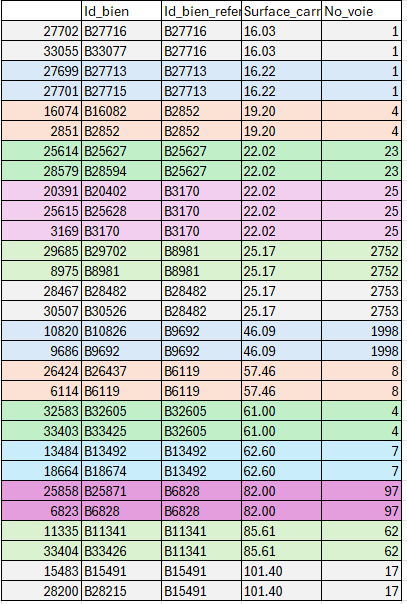

In [562]:
Table_doublon_bien_2

,Id_bien,No_voie,BTQ,Type_de_voie,Voie,Code_postal,Total_piece,Surface_carrez,Surface_reelle,Type_local,Surface_terrain,Id_codedep_codecommune,Id_bien_reference
27702,B27716,1,,PL,DE HANOVRE,76100,1,16.03,16,Appartement,0,C76540,B27716
33055,B33077,1,,PL,DE HANOVRE,76100,1,16.03,16,Appartement,0,C76540,B27716
27699,B27713,1,,PL,DE HANOVRE,76100,1,16.22,16,Appartement,0,C76540,B27713
27701,B27715,1,,PL,DE HANOVRE,76100,1,16.22,16,Appartement,0,C76540,B27713
16074,B16082,4,,RUE,DE LA ROCHE BENOTTE,91580,1,19.20,19,Appartement,0,C91226,B2852
2851,B2852,4,,RUE,DE LA ROCHE BENOTTE,91580,1,19.20,19,Appartement,0,C91226,B2852
25614,B25627,23,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307,B25627
28579,B28594,23,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307,B25627
20391,B20402,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307,B3170
25615,B25628,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307,B3170


<u>**REFLEXION :**</u>  

- EN FAVEUR de la suppression des doublons :  
Pour ce qui est de la maison de 46,09 m2, il parait peu probable, qu'il existe 2 maisons différentes de même superficie, à la même adresse.

- EN DEFAVEUR de la suppression des doublons :  
Pour la maison : il pourrait s'agir d'un lotissement avec des maisons identiques et une entrée commune.
Pour les appartements : il est tout à fait possible d'avoir 2 appartements différents à la même adresse, et de superificie identique, car les étages ont été conçu à l'identique.
Pour l'appartement de 22,02m2 au 25 rue d'amsterdam, il parait peu probable que ce soit le même appartement qui ait été vendu 3 fois dans la même année. Au vu des délais des ventes qui prennnent au minimum 3 mois, cela parait très peu probable.


=> JE CHOISIS DONC DE NE PAS RETIRER DE DOUBLON car je ne peux pas être sûr qu'il s'agit bien de la maison.  
Je garde cela en tête. Mais au vu des statistiques que je dois faire, Cela ne devrait pas avoir d'impact.

Je retiens également que si je choisi d'éliminer les doublons je suivrai la table de correspondance suivante :


In [565]:
Table_doublon_bien_correspondance

,Id_bien,Id_bien_reference
27702,B27716,B27716
33055,B33077,B27716
27699,B27713,B27713
27701,B27715,B27713
16074,B16082,B2852
2851,B2852,B2852
25614,B25627,B25627
28579,B28594,B25627
20391,B20402,B3170
25615,B25628,B3170


Et j'effectuerai les opérations suivantes :

In [567]:
Bien_2_sans_doublon = Bien_2.copy(deep=True)

In [568]:
Bien_2_sans_doublon.head()

,Id_bien,No_voie,BTQ,Type_de_voie,Voie,Code_postal,Total_piece,Surface_carrez,Surface_reelle,Type_local,Surface_terrain,Id_codedep_codecommune
0,B0,347,,RUE,DU CHATEAU,1170,3,48.22,48,Appartement,0,C01103
1,B1,4,,BD,EDOUARD BAUDOIN,6160,1,39.11,40,Appartement,0,C06004
2,B2,20,B,RUE,MARCEAU,6000,3,80.25,82,Appartement,0,C06088
3,B3,550,,RTE,DES VESPINS RN7,6700,1,27.51,27,Appartement,0,C06123
4,B4,9300,,RES,LES ARPEGES BD DES ABA,13400,2,47.33,47,Appartement,0,C13005


In [569]:
for elt in Table_doublon_bien_correspondance['Id_bien'] :
    print(elt)

B27716
B33077
B27713
B27715
B16082
B2852
B25627
B28594
B20402
B25628
B3170
B29702
B8981
B28482
B30526
B10826
B9692
B26437
B6119
B32605
B33425
B13492
B18674
B25871
B6828
B11341
B33426
B15491
B28215


In [570]:
for elt in Table_doublon_bien_correspondance['Id_bien'] :
    print(Table_doublon_bien_correspondance.loc[Table_doublon_bien_correspondance['Id_bien']==elt,'Id_bien_reference'])

27702    B27716
Name: Id_bien_reference, dtype: object
33055    B27716
Name: Id_bien_reference, dtype: object
27699    B27713
Name: Id_bien_reference, dtype: object
27701    B27713
Name: Id_bien_reference, dtype: object
16074    B2852
Name: Id_bien_reference, dtype: object
2851    B2852
Name: Id_bien_reference, dtype: object
25614    B25627
Name: Id_bien_reference, dtype: object
28579    B25627
Name: Id_bien_reference, dtype: object
20391    B3170
Name: Id_bien_reference, dtype: object
25615    B3170
Name: Id_bien_reference, dtype: object
3169    B3170
Name: Id_bien_reference, dtype: object
29685    B8981
Name: Id_bien_reference, dtype: object
8975    B8981
Name: Id_bien_reference, dtype: object
28467    B28482
Name: Id_bien_reference, dtype: object
30507    B28482
Name: Id_bien_reference, dtype: object
10820    B9692
Name: Id_bien_reference, dtype: object
9686    B9692
Name: Id_bien_reference, dtype: object
26424    B6119
Name: Id_bien_reference, dtype: object
6114    B6119
Name: Id_b

In [571]:
for elt in Table_doublon_bien_correspondance['Id_bien']:
    if elt not in (Table_doublon_bien_correspondance['Id_bien_reference']).to_list() :
        print(elt)

B33077
B27715
B16082
B28594
B20402
B25628
B29702
B30526
B10826
B26437
B33425
B18674
B25871
B33426
B28215


In [572]:
#Bug
#for elt in Table_doublon_bien_correspondance['Id_bien'] :
#    Bien_2_sans_doublon.loc[Bien_2_sans_doublon['Id_bien']==elt,'Id_bien']=Table_doublon_bien_correspondance.loc[Table_doublon_bien_correspondance['Id_bien']==elt,'Id_bien_reference']

In [573]:
Description_Fichier_Tableau_avc_ValBlanches(Bien_1)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Id_bien,string[python],34146,34146,0,34146,0
No_voie,int16,34146,34146,0,1468,0
BTQ,object,34146,34146,0,25,31973
Type_de_voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
Code_postal,int32,34146,34146,0,2449,0
Total_piece,int64,34146,34146,0,12,0
Surface_carrez,float64,34146,34146,0,10394,0
Surface_reelle,int64,34146,34146,0,254,0
Type_local,object,34146,34146,0,2,0


In [574]:
for elt in Table_doublon_bien_correspondance['Id_bien']:
    if elt not in (Table_doublon_bien_correspondance['Id_bien_reference']).to_list() :
        Bien_2_sans_doublon.loc[Bien_2_sans_doublon['Id_bien']==elt,'Id_bien']=Table_doublon_bien_correspondance.loc[Table_doublon_bien_correspondance['Id_bien']==elt,'Id_bien_reference']

In [575]:
(Bien_2_sans_doublon.loc[Bien_2_sans_doublon.duplicated(subset = liste_tte_col_Bien_sauf_Id,keep=False) , :] ).sort_values(by=['Surface_carrez','No_voie','Id_bien'])

,Id_bien,No_voie,BTQ,Type_de_voie,Voie,Code_postal,Total_piece,Surface_carrez,Surface_reelle,Type_local,Surface_terrain,Id_codedep_codecommune
27702,B27716,1,,PL,DE HANOVRE,76100,1,16.03,16,Appartement,0,C76540
33055,B27716,1,,PL,DE HANOVRE,76100,1,16.03,16,Appartement,0,C76540
27699,B27713,1,,PL,DE HANOVRE,76100,1,16.22,16,Appartement,0,C76540
27701,B27713,1,,PL,DE HANOVRE,76100,1,16.22,16,Appartement,0,C76540
2851,B2852,4,,RUE,DE LA ROCHE BENOTTE,91580,1,19.20,19,Appartement,0,C91226
16074,B2852,4,,RUE,DE LA ROCHE BENOTTE,91580,1,19.20,19,Appartement,0,C91226
25614,B25627,23,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
28579,B25627,23,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
3169,B3170,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
20391,B3170,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307


In [576]:
Description_Fichier_Tableau_avc_ValBlanches(Bien_1)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Id_bien,string[python],34146,34146,0,34146,0
No_voie,int16,34146,34146,0,1468,0
BTQ,object,34146,34146,0,25,31973
Type_de_voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
Code_postal,int32,34146,34146,0,2449,0
Total_piece,int64,34146,34146,0,12,0
Surface_carrez,float64,34146,34146,0,10394,0
Surface_reelle,int64,34146,34146,0,254,0
Type_local,object,34146,34146,0,2,0


JE PERDS BEAUCOUP DE TEMPS POUR SUPPRIMER DES DOUBLONS QU J'ai choisi de ne pas supprimer  
dlonc je vais le finir à la main.  
Et si je décide finalement de supprimer les doublons on verra !  

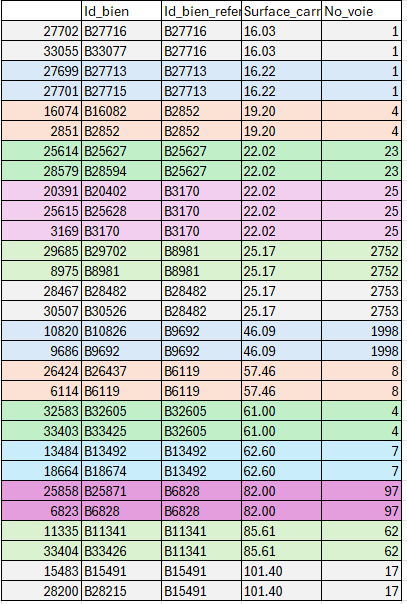

In [579]:
Bien_2_sans_doublon.loc[16074,'Id_bien']='B2852'
Bien_2_sans_doublon.loc[20391,'Id_bien']='B3170'
Bien_2_sans_doublon.loc[25615,'Id_bien']='B3170'
Bien_2_sans_doublon.loc[29685,'Id_bien']='B8981'
Bien_2_sans_doublon.loc[10820,'Id_bien']='B9692'
Bien_2_sans_doublon.loc[26424,'Id_bien']='B6119'
Bien_2_sans_doublon.loc[25858,'Id_bien']='B6828'

In [580]:
(Bien_2_sans_doublon.loc[Bien_2_sans_doublon.duplicated(subset = liste_tte_col_Bien_sauf_Id,keep=False) , :] ).sort_values(by=['Surface_carrez','No_voie','Id_bien'])

,Id_bien,No_voie,BTQ,Type_de_voie,Voie,Code_postal,Total_piece,Surface_carrez,Surface_reelle,Type_local,Surface_terrain,Id_codedep_codecommune
27702,B27716,1,,PL,DE HANOVRE,76100,1,16.03,16,Appartement,0,C76540
33055,B27716,1,,PL,DE HANOVRE,76100,1,16.03,16,Appartement,0,C76540
27699,B27713,1,,PL,DE HANOVRE,76100,1,16.22,16,Appartement,0,C76540
27701,B27713,1,,PL,DE HANOVRE,76100,1,16.22,16,Appartement,0,C76540
2851,B2852,4,,RUE,DE LA ROCHE BENOTTE,91580,1,19.20,19,Appartement,0,C91226
16074,B2852,4,,RUE,DE LA ROCHE BENOTTE,91580,1,19.20,19,Appartement,0,C91226
25614,B25627,23,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
28579,B25627,23,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
3169,B3170,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307
20391,B3170,25,,RUE,D AMSTERDAM,77144,1,22.02,22,Appartement,0,C77307


SUPPRIMONS LES DOUBLONS :

In [582]:
Bien_2_sans_doublon.drop_duplicates(keep='first',inplace=True)

In [583]:
Bien_2_sans_doublon.duplicated(subset = liste_tte_col_Bien_sauf_Id)

0        False
1        False
2        False
3        False
4        False
         ...  
34141    False
34142    False
34143    False
34144    False
34145    False
Length: 34131, dtype: bool

In [584]:
(Bien_2_sans_doublon.duplicated(subset = liste_tte_col_Bien_sauf_Id)).value_counts()

False    34131
Name: count, dtype: int64

In [585]:
print("il y a :",
      (Bien_2_sans_doublon.duplicated(subset = liste_tte_col_Bien_sauf_Id)).sum(),
      "doublon(s)")

il y a : 0 doublon(s)


**J'ai fait un fichier SANS DOUBLON : Bien_2_sans_doublon  
Mais comme indiqué je ne vais pas supprimer les doublons.  
Donc je vais continuer à travailler sur Bien_1**

##### Remarque :

En fait j'aurais plutôt du faire un fichier des modifications de la sorte :

In [589]:
Table_doublon_bien_correspondance

,Id_bien,Id_bien_reference
27702,B27716,B27716
33055,B33077,B27716
27699,B27713,B27713
27701,B27715,B27713
16074,B16082,B2852
2851,B2852,B2852
25614,B25627,B25627
28579,B28594,B25627
20391,B20402,B3170
25615,B25628,B3170


In [590]:
Table_doublon_bien_correspondance.loc[Table_doublon_bien_correspondance['Id_bien']==Table_doublon_bien_correspondance['Id_bien_reference'],:]

,Id_bien,Id_bien_reference
27702,B27716,B27716
27699,B27713,B27713
2851,B2852,B2852
25614,B25627,B25627
3169,B3170,B3170
8975,B8981,B8981
28467,B28482,B28482
9686,B9692,B9692
6114,B6119,B6119
32583,B32605,B32605


In [591]:
(Table_doublon_bien_correspondance.loc[Table_doublon_bien_correspondance['Id_bien']==Table_doublon_bien_correspondance['Id_bien_reference'],:]).index

Index([27702, 27699,  2851, 25614,  3169,  8975, 28467,  9686,  6114, 32583,
       13484,  6823, 11335, 15483],
      dtype='int64')

In [592]:
liste_index_reference = (Table_doublon_bien_correspondance.loc[Table_doublon_bien_correspondance['Id_bien']==Table_doublon_bien_correspondance['Id_bien_reference'],:]).index

In [593]:
Table_doublon_bien_correspondance_2 = Table_doublon_bien_correspondance[:]

In [594]:
Table_doublon_bien_correspondance_2['Reference']=False
Table_doublon_bien_correspondance_2['Doublon']=True

C:\Users\matth\AppData\Local\Temp\ipykernel_36580\1602978140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table_doublon_bien_correspondance_2['Reference']=False
C:\Users\matth\AppData\Local\Temp\ipykernel_36580\1602978140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table_doublon_bien_correspondance_2['Doublon']=True


In [595]:
Table_doublon_bien_correspondance_2

,Id_bien,Id_bien_reference,Reference,Doublon
27702,B27716,B27716,False,True
33055,B33077,B27716,False,True
27699,B27713,B27713,False,True
27701,B27715,B27713,False,True
16074,B16082,B2852,False,True
2851,B2852,B2852,False,True
25614,B25627,B25627,False,True
28579,B28594,B25627,False,True
20391,B20402,B3170,False,True
25615,B25628,B3170,False,True


In [596]:
for elt in liste_index_reference :
    Table_doublon_bien_correspondance_2.loc[elt,'Reference']=True
    Table_doublon_bien_correspondance_2.loc[elt,'Doublon']=False

In [597]:
Table_doublon_bien_correspondance_2

,Id_bien,Id_bien_reference,Reference,Doublon
27702,B27716,B27716,True,False
33055,B33077,B27716,False,True
27699,B27713,B27713,True,False
27701,B27715,B27713,False,True
16074,B16082,B2852,False,True
2851,B2852,B2852,True,False
25614,B25627,B25627,True,False
28579,B28594,B25627,False,True
20391,B20402,B3170,False,True
25615,B25628,B3170,False,True


#### <font color='blue'>7. Si doublon, ne garder qu'un Id_bien et créer une table de correspondance d'Id remplacé.</font>

Je fais le choix de ne pas remplacer les quelques doublons, car onne peut pas être sûr que ce sont de vrais doublons à cause de la présence d'appartement.  
De plus cela ne devrait pas avoir d'impact sur les statistiques que nous aurons à faire.

Je conserve donc le fichier Bien_1 tel qu'il était avant travail sur les doublons

#### <font color='blue'>8. Puis mettre à jour la Table Vente avec la table de correspondance d'Id_Bien doublon</font>

Choix de ne pas supprimer de doublons => PAS D'ACTION

#### <font color='blue'>9. EXPORTATION DES FICHIERS BIEN et VENTE</font>

In [603]:
Description_Fichier_Tableau_avc_ValBlanches(Bien_1)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Id_bien,string[python],34146,34146,0,34146,0
No_voie,int16,34146,34146,0,1468,0
BTQ,object,34146,34146,0,25,31973
Type_de_voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
Code_postal,int32,34146,34146,0,2449,0
Total_piece,int64,34146,34146,0,12,0
Surface_carrez,float64,34146,34146,0,10394,0
Surface_reelle,int64,34146,34146,0,254,0
Type_local,object,34146,34146,0,2,0


In [604]:
Bien_final = Bien_1.copy(deep=True)

In [605]:
Description_Fichier_Tableau_avc_ValBlanches(Bien_final)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Id_bien,string[python],34146,34146,0,34146,0
No_voie,int16,34146,34146,0,1468,0
BTQ,object,34146,34146,0,25,31973
Type_de_voie,object,34146,34146,0,80,940
Voie,object,34146,34146,0,14130,0
Code_postal,int32,34146,34146,0,2449,0
Total_piece,int64,34146,34146,0,12,0
Surface_carrez,float64,34146,34146,0,10394,0
Surface_reelle,int64,34146,34146,0,254,0
Type_local,object,34146,34146,0,2,0


In [606]:
Bien_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id_bien                 34146 non-null  string 
 1   No_voie                 34146 non-null  int16  
 2   BTQ                     34146 non-null  object 
 3   Type_de_voie            34146 non-null  object 
 4   Voie                    34146 non-null  object 
 5   Code_postal             34146 non-null  int32  
 6   Total_piece             34146 non-null  int64  
 7   Surface_carrez          34146 non-null  float64
 8   Surface_reelle          34146 non-null  int64  
 9   Type_local              34146 non-null  object 
 10  Surface_terrain         34146 non-null  int16  
 11  Id_codedep_codecommune  34146 non-null  object 
dtypes: float64(1), int16(2), int32(1), int64(2), object(5), string(1)
memory usage: 2.6+ MB


In [607]:
Bien_final.to_csv('Bien.csv',index=False)

In [608]:
Bien_final.to_excel('Bien.xlsx',index=False)

In [609]:
Vente_final = Vente_1.copy(deep=True)

In [610]:
Description_Fichier_Tableau_avc_ValBlanches(Vente_final)

,Type,Nb lignes,Valeurs non-vides,Valeurs vides,Valeurs distinctes,Valeurs blanches
Id_vente,string[python],34146,34146,0,34146,0
Date_vente,datetime64[ns],34146,34146,0,158,0
Valeur,float64,34146,34146,0,9677,0
Id_bien,string[python],34146,34146,0,34146,0


In [611]:
Vente_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id_vente    34146 non-null  string        
 1   Date_vente  34146 non-null  datetime64[ns]
 2   Valeur      34146 non-null  float64       
 3   Id_bien     34146 non-null  string        
dtypes: datetime64[ns](1), float64(1), string(2)
memory usage: 1.0 MB


In [612]:
Vente_final.to_csv('Vente.csv',index=False)

In [613]:
Vente_final.to_excel('Vente.xlsx',index=False)

## <font color='red'><u> V. EXPORTATION DES TABLES </u></font>

**ATTENTION AUX SHALLOW COPY et DEEP COPY :  
Une shallow copy crée un nouvel objet mais qui poionte vers les même données que le premier=> une modification sur l'une modifie l'autre.
Il faut faire un DEEP COPY si on veut que les données soient indépendantes également**  

source : https://medium.com/@mathieuvdp/attention-au-deep-copy-de-pandas-8ebbdd5b0b92  

Bien_2 = Bien_1.copy(deep=False) =>shallow copy  
Bien_2 = Bien_1.copy(deep=True) => deep_copy